In [1]:
import os
import re
import platform

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
plt.style.use('ggplot')

from datetime import datetime
from tqdm import tqdm
from collections import Counter
import swifter
from konlpy.tag import Kkma, Komoran, Okt, Mecab
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
def Fontmanager():

    plt.rcParams['axes.unicode_minus'] = False

    if platform.system() == 'Windows':
        path = "c:/Windows/Fonts/malgun.ttf"
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Darwin':
        path = '/Library/Fonts/Arial Unicode.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='AppleGothic')
    elif platform.system() == 'Linux':
        path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family='NanumBarunGothic')
    else:
        print('Unknown system... sorry~~~~~~')
    print(f"해당 pc의 운영 체제는 {platform.system()}이며 {font_name}로 설정되었습니다")  
    return path

In [4]:
path = Fontmanager()

해당 pc의 운영 체제는 Darwin이며 Arial Unicode MS로 설정되었습니다


In [10]:
women_policy = pd.read_csv('dataset/women_policy_final.csv')
minister = pd.read_csv('dataset/minister_final.csv')
repeal = pd.read_csv('dataset/repeal_final.csv')

In [11]:
# 혹시 모를 중복제거
women_policy = women_policy.drop_duplicates()
minister = minister.drop_duplicates()
repeal = repeal.drop_duplicates()

In [12]:
# 혹시 모를 nan값 확인
women_policy.isna().sum()

datetime       0
id             0
text           0
username       0
tokenized      0
label          0
score          0
label_word     0
text_re        0
multi_label    0
dtype: int64

In [13]:
minister.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
dtype: int64

In [14]:
repeal.isna().sum()

datetime       0
id             0
text           0
username       0
text_re        0
multi_label    0
label          0
score          0
label_word     0
dtype: int64

## hashtag

In [15]:
def hashtag_preprocessing(df,column):
    texts = df[column.apply(lambda x : x.startswith('#'))]
    texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
    texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
    texts['text'] = texts['text'].str.split(' ').apply(lambda x : [i for i in x if i.startswith('#') ])
    word_of_Bag = sum(texts['text'], [])
    return word_of_Bag

In [16]:
word_of_Bag_w = hashtag_preprocessing(women_policy, women_policy['text'])

<ipython-input-15-2d559ca9b3ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
<ipython-input-15-2d559ca9b3ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
<ipython-input-15-2d559ca9b3ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [17]:
word_of_Bag_m = hashtag_preprocessing(minister, minister['text'])

<ipython-input-15-2d559ca9b3ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
<ipython-input-15-2d559ca9b3ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
<ipython-input-15-2d559ca9b3ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [18]:
word_of_Bag_r = hashtag_preprocessing(repeal, repeal['text'])

<ipython-input-15-2d559ca9b3ad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].str.split('\n').apply(lambda x : [i for i in x if i.startswith('#') ])
<ipython-input-15-2d559ca9b3ad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  texts['text'] = texts['text'].apply(lambda x: ' '.join(x))
<ipython-input-15-2d559ca9b3ad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

No handles with labels found to put in legend.


그림 저장: women policy hashtag graph


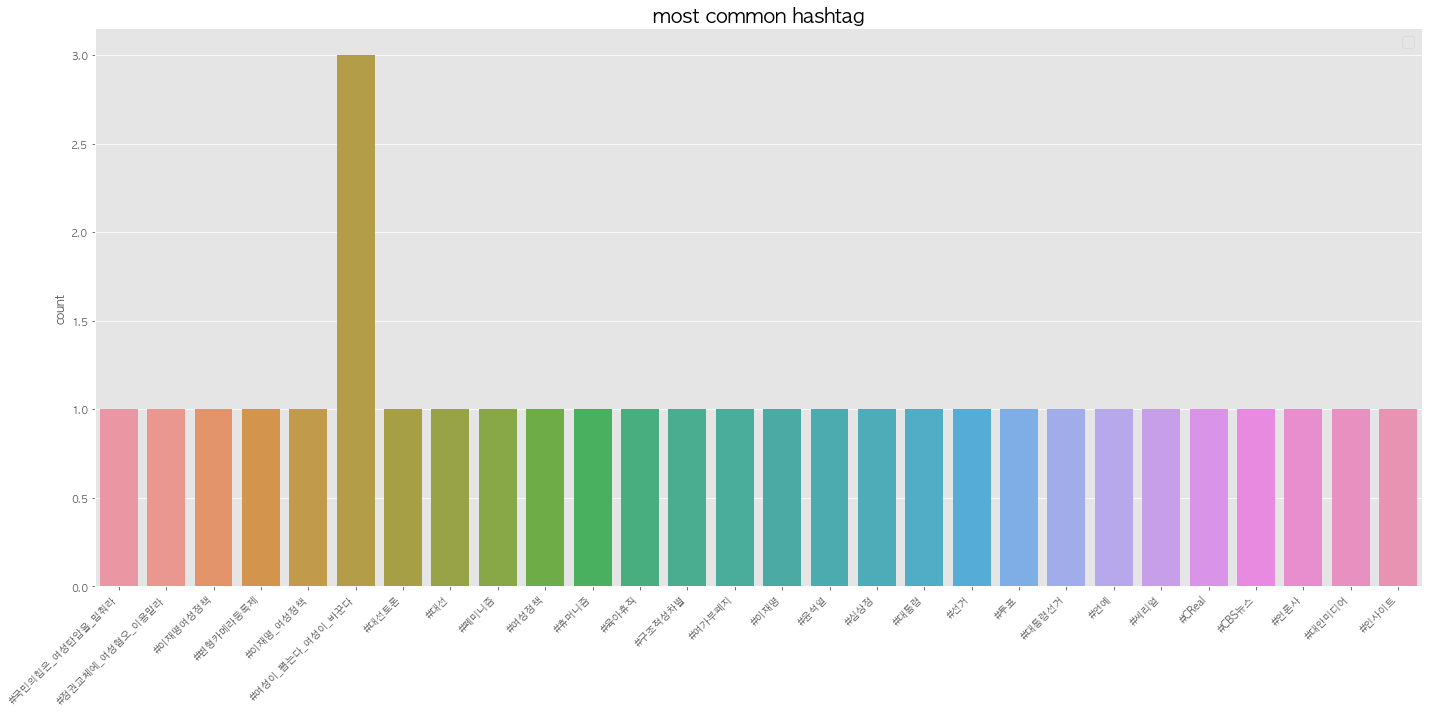

In [21]:
# women policy hashtag graph
plt.figure(figsize=(20,10))
plot = sns.countplot(word_of_Bag_w)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
save_fig('women policy hashtag graph')

No handles with labels found to put in legend.


그림 저장: minister hashtag graph


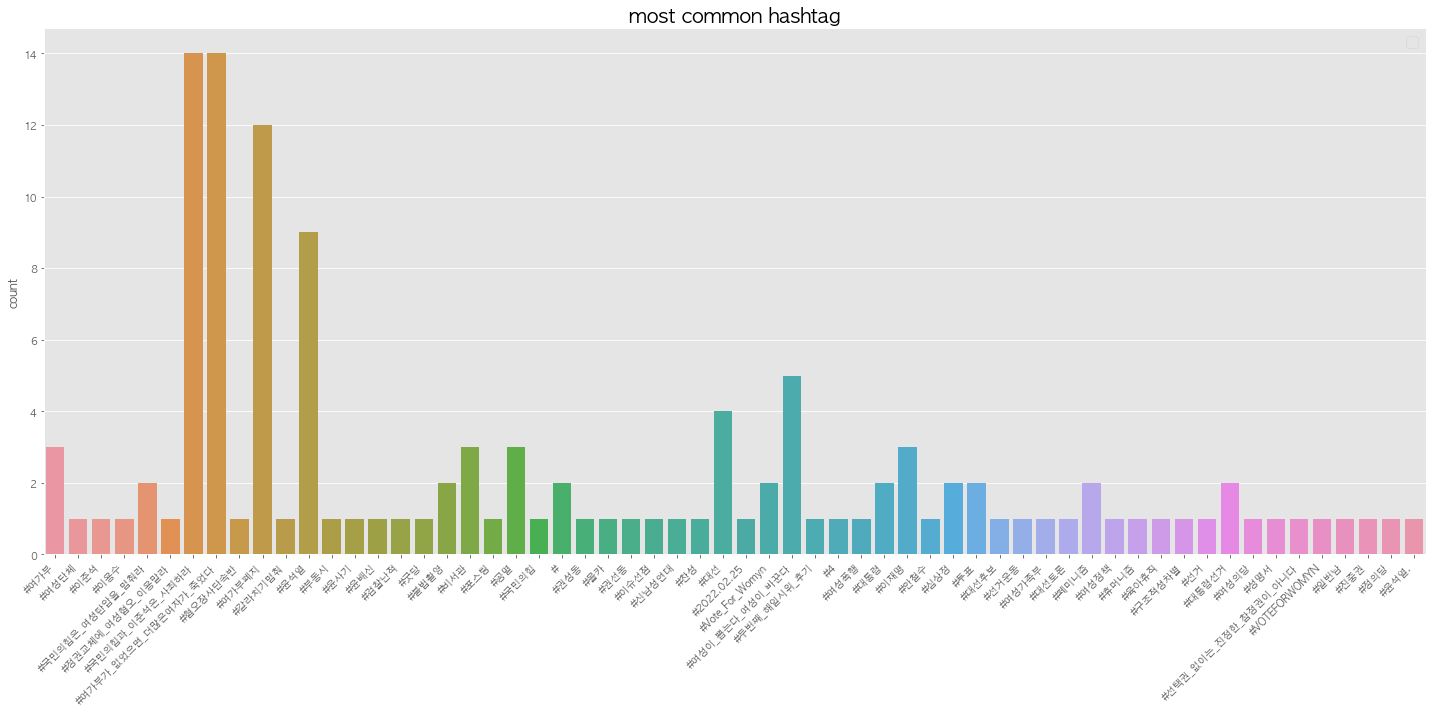

In [22]:
# minister hashtag graph
plt.figure(figsize=(20,10))
plot = sns.countplot(word_of_Bag_m)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
save_fig('minister hashtag graph')

No handles with labels found to put in legend.


그림 저장: repeal hashtag graph


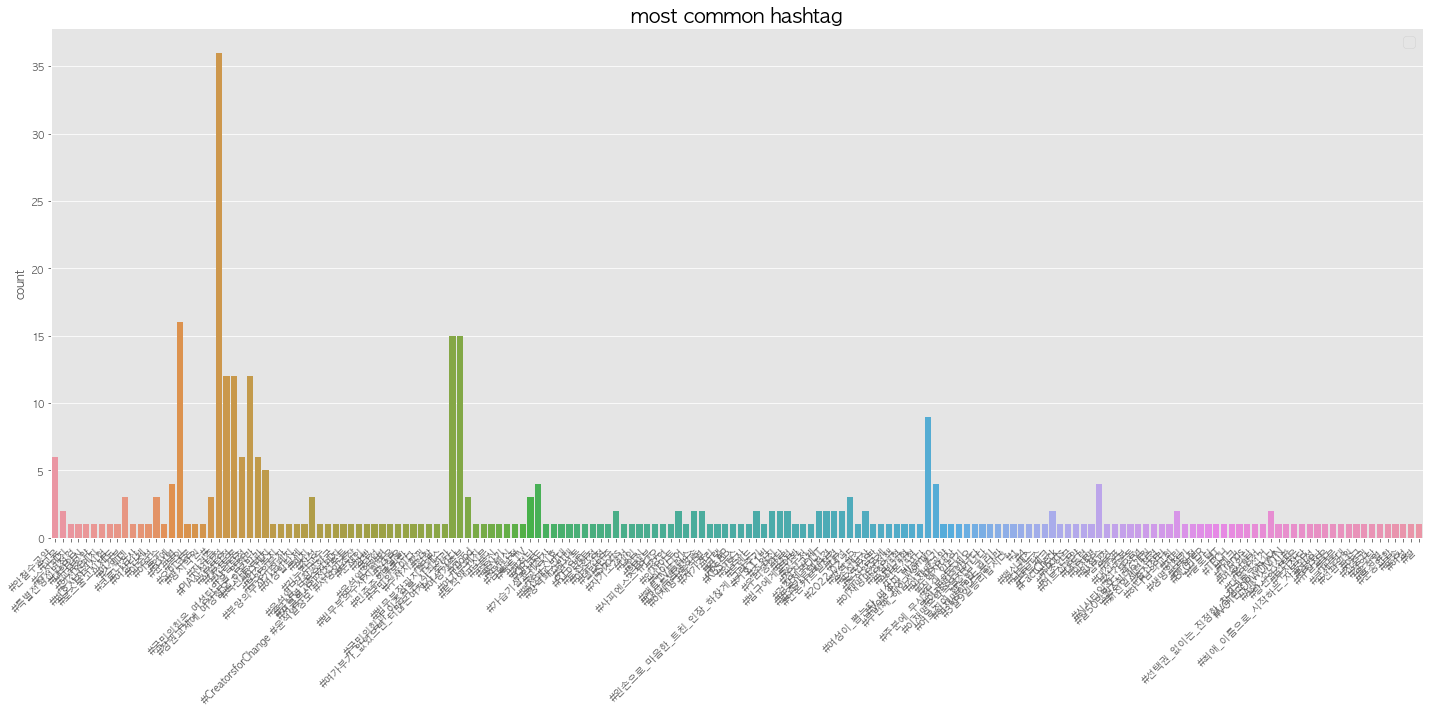

In [23]:
# repeal hashtag graph
plt.figure(figsize=(20,10))
plot = sns.countplot(word_of_Bag_r)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common hashtag', fontsize=20)
plt.legend(fontsize=15)
save_fig('repeal hashtag graph')

### 전처리

In [24]:
# 정규표현식 이용한 전처리
def clean(text):
    #\n 공백 제거
    text = re.sub('\n',' ',str(text))
    # &gt; &lt; &amp;
    text = re.sub('[&]+[a-z]+', '', str(text))
    # URL 제거
    text = re.sub('https://[A-Za-z0-9./]*','',str(text))
    # 한글자 제거 (ex:ㅋㅋ, ㅜㅜ)
    text = re.sub('([ㄱ-ㅎㅏ-ㅣ])+', '', str(text))
    # 숫자 제거 (숫자 + 숫자만 제거, ex: 1인가족)
    text= re.sub('[0-9]{2}', '', str(text))
    # @알파벳 제거 
    text = re.sub('@[A-Za-z0-9./]*','',str(text))
#     # 숫자 문자외 제거
#     text = re.sub('[^0-9a-zA-Zㄱ-ㅎ가-힣]', ' ', text)
    return str(text)

## who did tweet the most

In [25]:
women_policy['text'] = women_policy['text'].apply(lambda x : clean(x))
minister['text'] = minister['text'].apply(lambda x : clean(x))
repeal['text'] = repeal['text'].apply(lambda x : clean(x))

그림 저장: who did tweet the most w


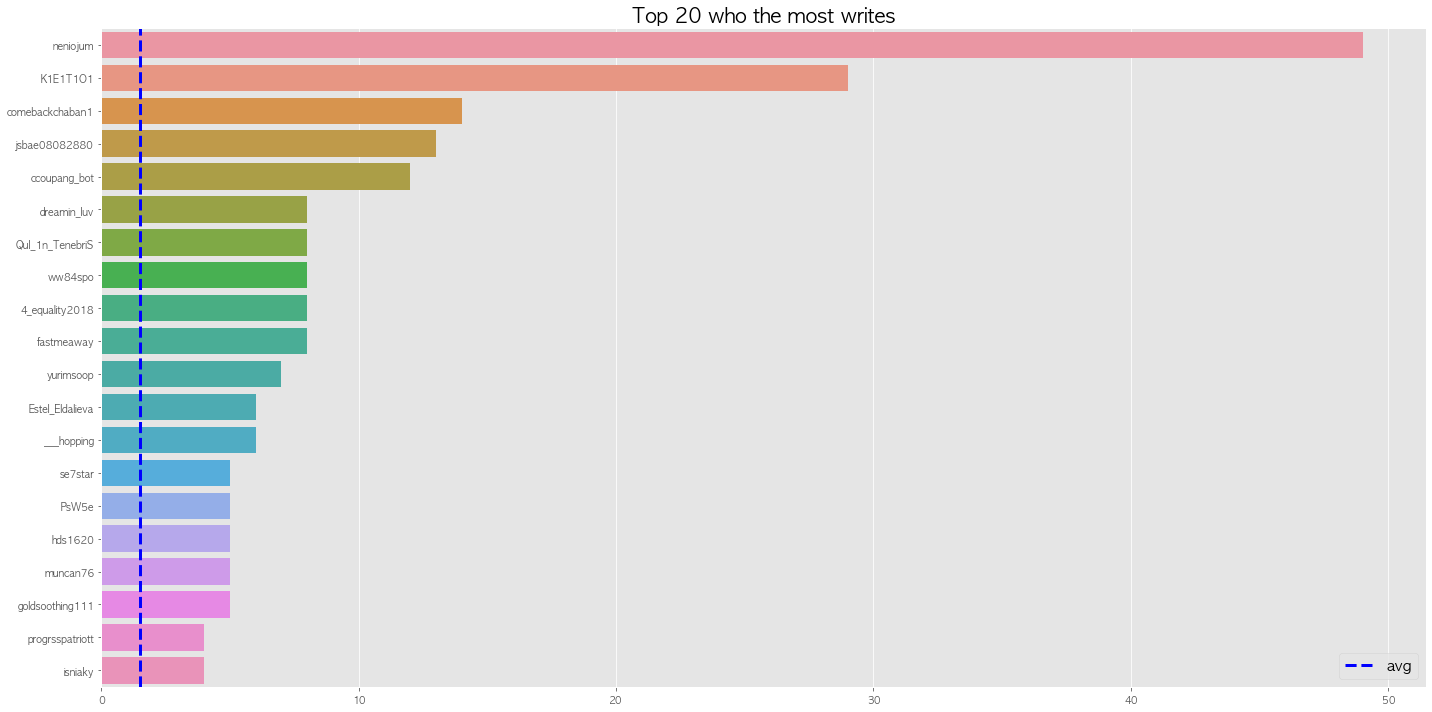

In [27]:
# women_policy
plt.figure(figsize=(20,10))
sns.barplot(x=women_policy['username'].value_counts()[:20].values, 
            y=women_policy['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(women_policy['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most w')

그림 저장: who did tweet the most m


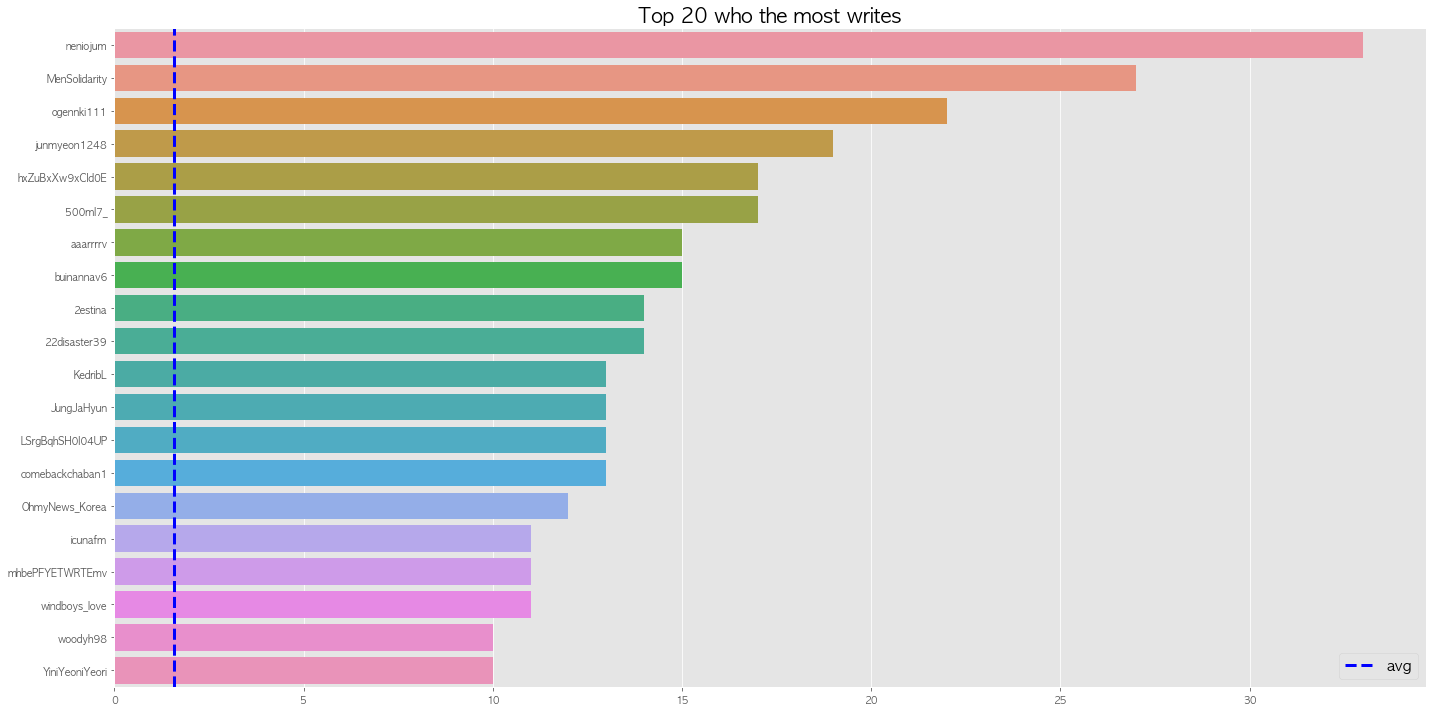

In [33]:
# minister
plt.figure(figsize=(20,10))
sns.barplot(x=minister['username'].value_counts()[:20].values, 
            y=minister['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(minister['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most m')

그림 저장: who did tweet the most r


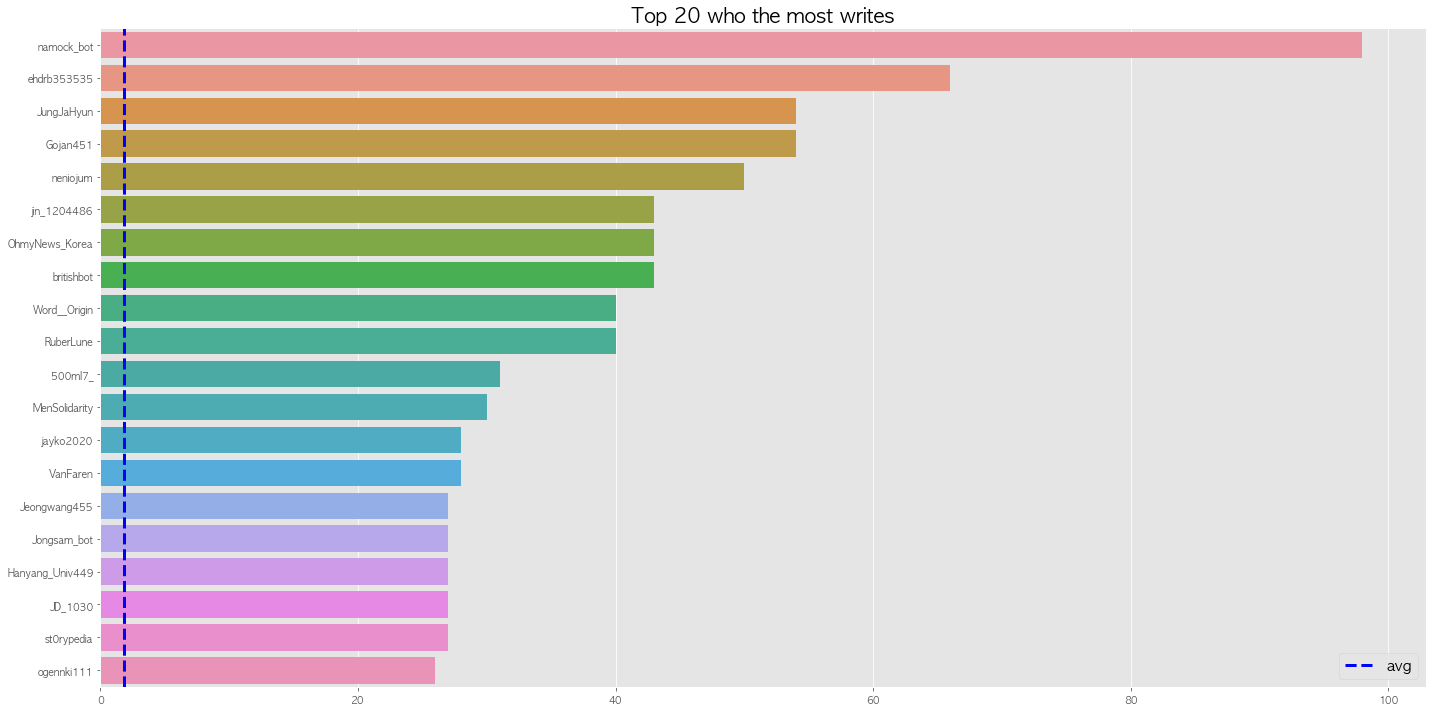

In [34]:
# minister
plt.figure(figsize=(20,10))
sns.barplot(x=repeal['username'].value_counts()[:20].values, 
            y=repeal['username'].value_counts()[:20].index,
           orient='h')
plt.title('Top 20 who the most writes', fontsize=20)
plt.axvline(x=np.average(repeal['username'].value_counts().values), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('who did tweet the most r')

## the lengths of the sentences

그림 저장: the lengths of the sentences w


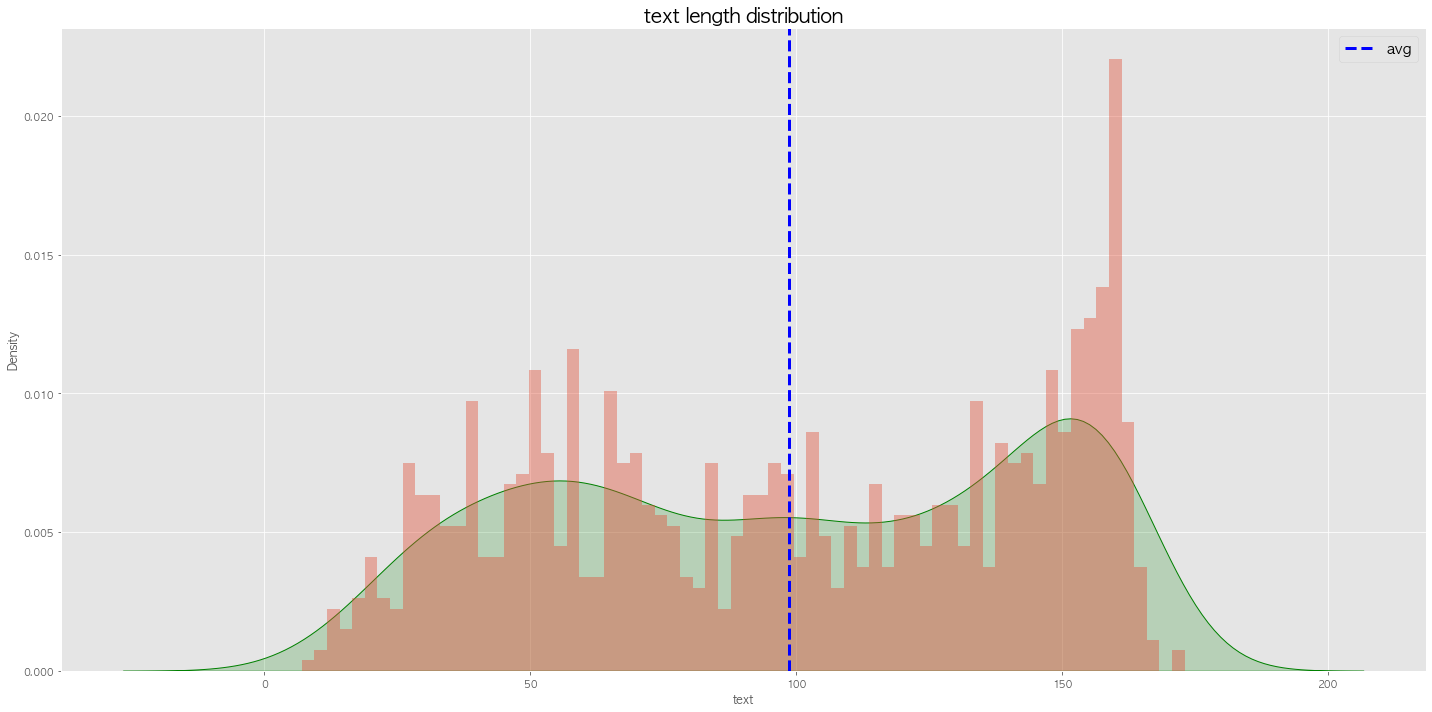

In [35]:
# women_policy
plt.figure(figsize=(20,10))
sns.distplot(a=women_policy['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(women_policy['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences w')

그림 저장: the lengths of the sentences m


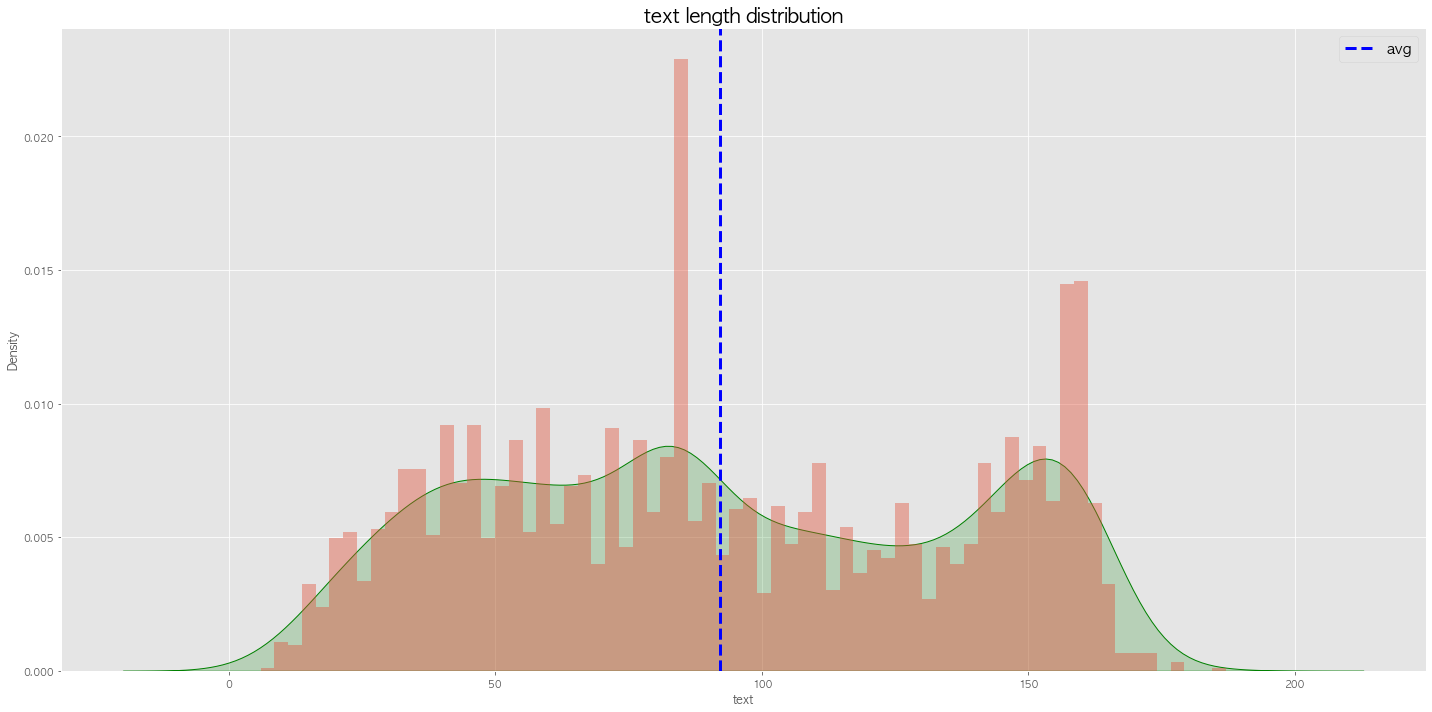

In [93]:
# minister
plt.figure(figsize=(20,10))
sns.distplot(a=minister['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(minister['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences m')

그림 저장: the lengths of the sentences r


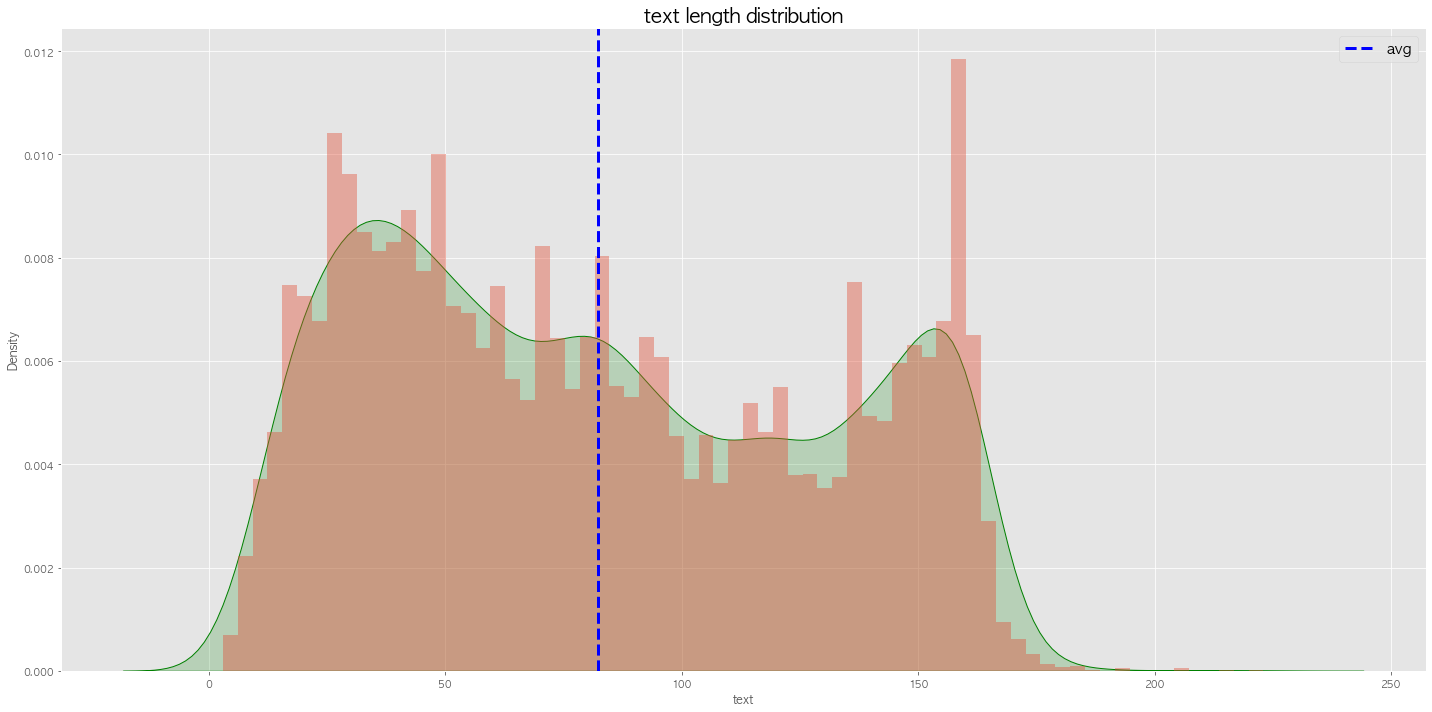

In [94]:
# repeal
plt.figure(figsize=(20,10))
sns.distplot(a=repeal['text'].str.len(), bins=70, kde=True,
             kde_kws={"color":"g", "alpha":0.2, "linewidth":1, "shade":True})
plt.title('text length distribution', fontsize=20)
plt.axvline(x=np.average(repeal['text'].str.len()), color='b', linestyle='--', linewidth=3, 
            label='avg')
plt.legend(fontsize=15)
save_fig('the lengths of the sentences r')

### Tokenizing

In [38]:
# tokenizer
# kkma = Kkma()
# komoran = Komoran()
# okt = Okt()
mecab = Mecab()

# stopwords list
stop_words = pd.read_csv('dataset/한국어불용어100.txt', sep = "\t", engine='python')
stop_words = list(stop_words["word"])

def preprocessing_mecab(sentence):
    #### Tokenize
    morphs = mecab.pos(sentence)
    
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    
    # Remove JOSA, EOMI, etc
    morphs[:] = (morph for morph in morphs if morph[1] not in JOSA+SIGN+TERMINATION+SUPPORT_VERB)
        
    # Remove length-1 words  
    morphs[:] = (morph for morph in morphs if not (len(morph[0]) == 1))
    
    # Remove Numbers
    morphs[:] = (morph for morph in morphs if morph[1] not in NUMBER)
   
    # Result pop-up
    result = []
    for morph in morphs:
        result.append(morph[0])
        
    return result

In [39]:
women_policy['tokenized'] = women_policy['text'].apply(lambda x: preprocessing_mecab(x))
women_policy['tokenized'] = women_policy['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

minister['tokenized'] = minister['text'].apply(lambda x: preprocessing_mecab(x))
minister['tokenized'] = minister['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

In [47]:
repeal['tokenized'] = repeal['text'].apply(lambda x: preprocessing_mecab(x))
repeal['tokenized'] = repeal['tokenized'].apply(lambda x: [item for item in x if item not in stop_words])

## wordcloud

In [124]:
def common_words(words, k):
    c = Counter(words)
    cw = c.most_common(k)
    return c, cw

def wordcloud(c):
    wc = WordCloud(font_path='Arial Unicode', width=1000, height=1000, background_color ='white', scale=2.0, max_font_size=250)
    gen = wc.generate_from_frequencies(c)
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(gen)
    plt.axis("off")
    plt.tight_layout(pad=0)
    # save_fig("most_common_words_wordcloud")
    
def cw_table(cw):
    df = pd.DataFrame(cw, columns=['keywords', 'count'])
    return df

그림 저장: wordcloud w


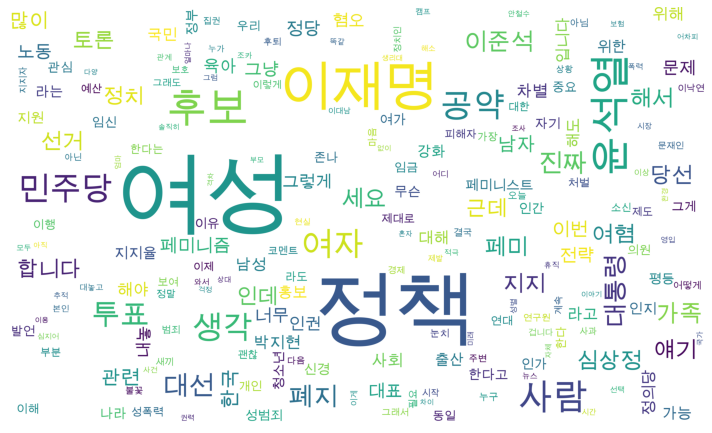

In [44]:
# women_policy
words_sum = sum(women_policy['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud w')

그림 저장: wordcloud m


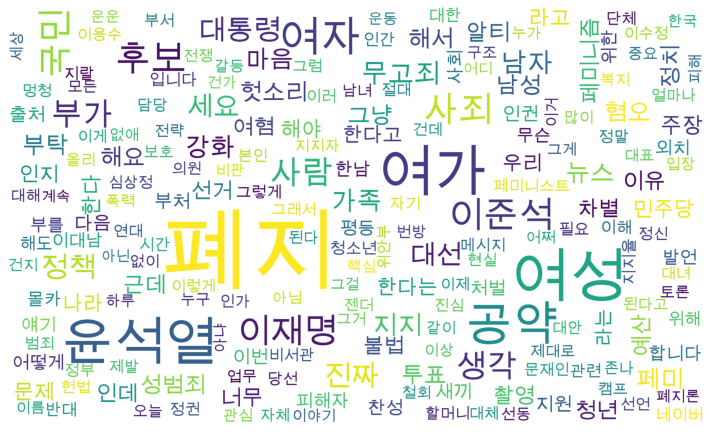

In [43]:
# minister
words_sum = sum(minister['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud m')

그림 저장: wordcloud r


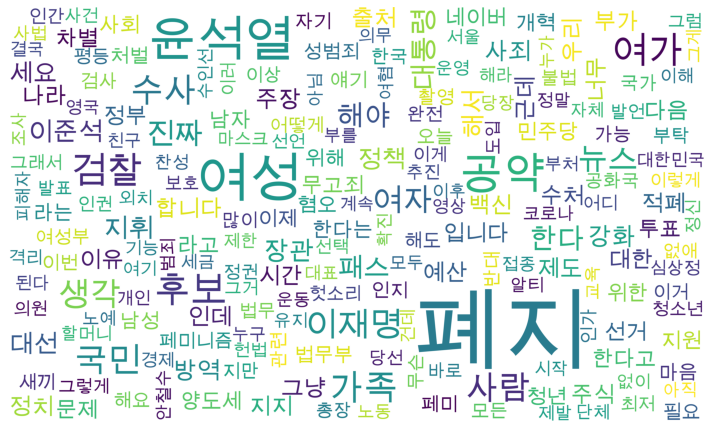

In [48]:
# repeal
words_sum = sum(repeal['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud r')

In [49]:
women_policy_w = women_policy.copy()
minister_m = minister.copy()
repeal_r = repeal.copy()

그림 저장: wordcloud without w


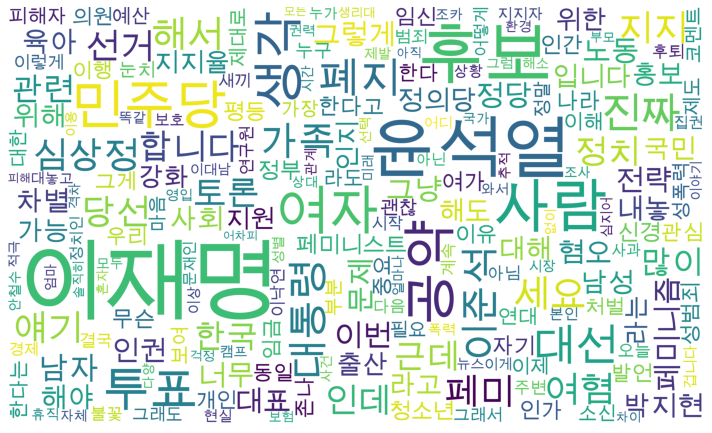

In [50]:
# women_policy without 여성, 정책
stop_words_w = ['여성', '정책']
women_policy_w['tokenized'] = women_policy_w['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(women_policy_w['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without w')

그림 저장: wordcloud without m


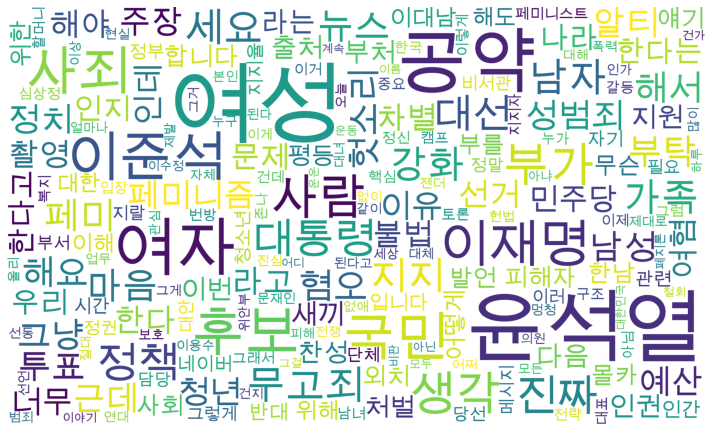

In [51]:
# minister without 여가부, 폐지
# 여가가 여가부 같으니
stop_words_m = ['여가부', '폐지', '여가']
minister_m['tokenized'] = minister_m['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_m])

words_sum = sum(minister_m['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without m')

그림 저장: wordcloud without r


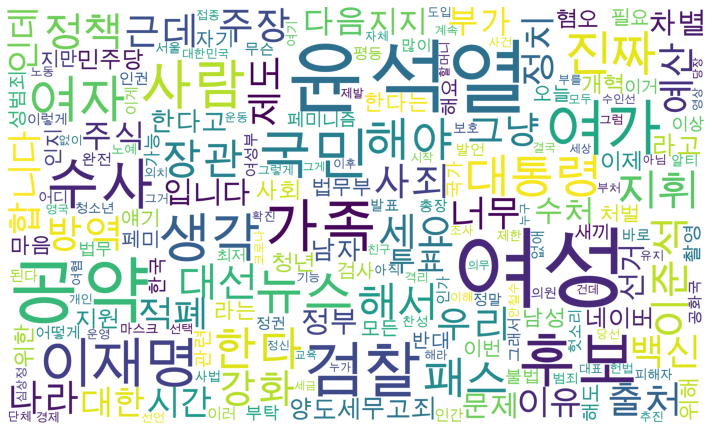

In [52]:
# repeal without 폐지
# 여가가 여가부 같으니
stop_words_r = ['폐지']
repeal_r['tokenized'] = repeal_r['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_r])

words_sum = sum(repeal_r['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without r')

In [ ]:
# women_policy
# '이재명' 포함한 문장
stop_words_lee=['이재명']
lee = women_policy_w[women_policy_w['text'].str.contains('이재명')]

lee['tokenized'] = lee['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_lee])

# wordcloud
words_sum = sum(lee['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
# save_fig('wordcloud lee')

## the most common words by date

In [53]:
women_policy_w['date'] = pd.to_datetime(women_policy_w['datetime']).apply(lambda x: x.date())
women_policy_w['date_re'] = women_policy_w['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in women_policy_w['date_re'].unique():
    tokenizing = sum(women_policy_w[women_policy_w['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

In [54]:
def add_value_labels(ax, word, spacing=5):
    for idx, rect in enumerate(ax.patches):
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        if y_value < 0:
            space *= -1
            va = 'top'

        label = "{0}".format(word[idx])

        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)  

No handles with labels found to put in legend.


그림 저장: most common word by date w


No handles with labels found to put in legend.


그림 저장: distribution by date w


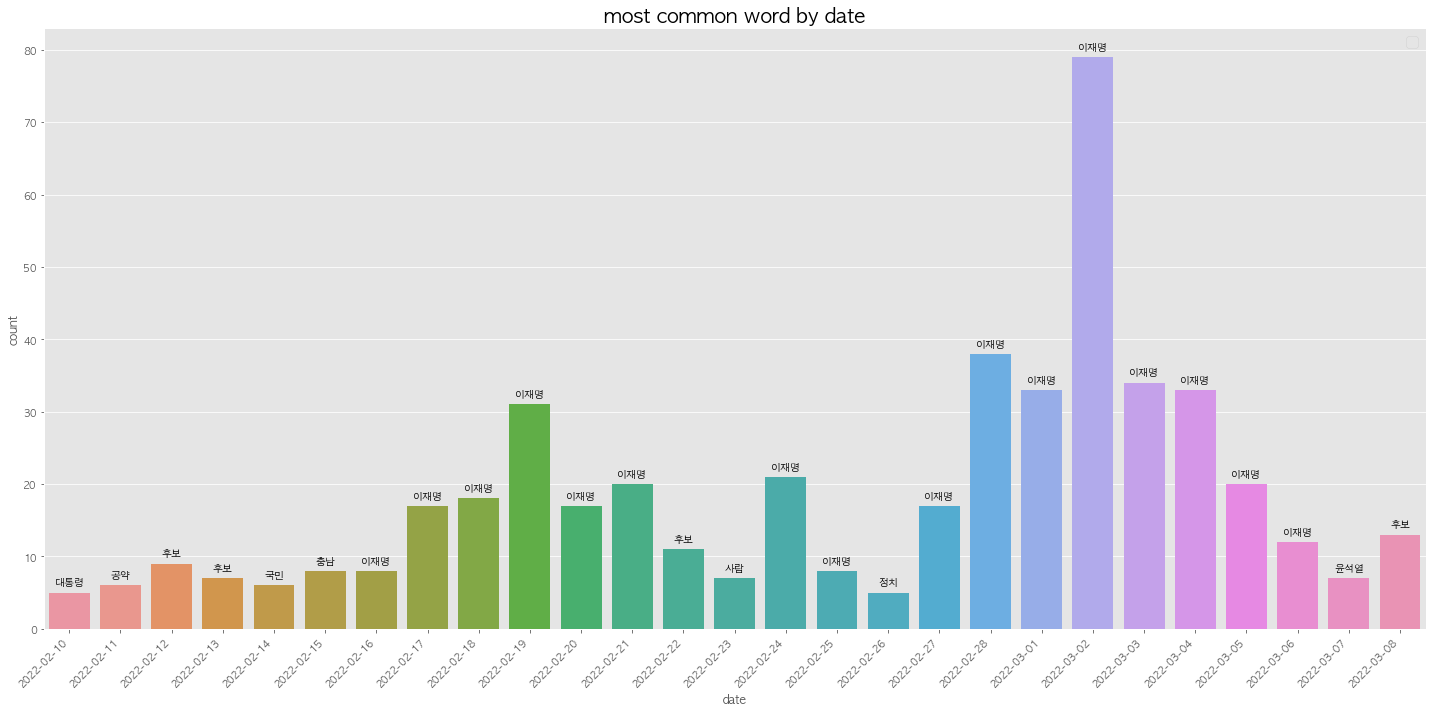

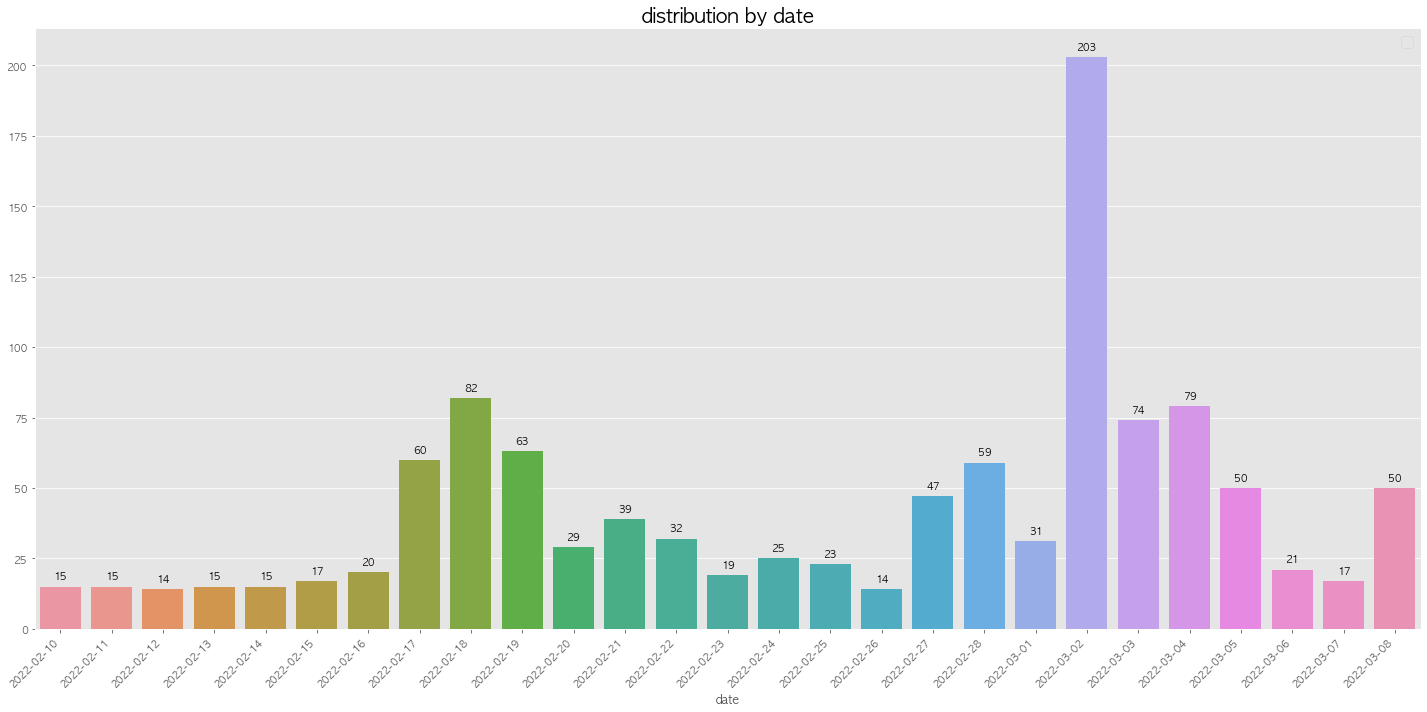

In [56]:
# women policy
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date w")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(women_policy_w.groupby('date').count()['date_re'].index,
                   women_policy_w.groupby('date').count()['date_re'].values)
add_value_labels(ax, women_policy_w.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date w")

In [153]:
# minister
minister_m['date'] = pd.to_datetime(minister_m['datetime']).apply(lambda x: x.date())
minister_m['date_re'] = minister_m['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in minister_m['date_re'].unique():
    tokenizing = sum(minister_m[minister_m['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

No handles with labels found to put in legend.


그림 저장: most common word by date m


No handles with labels found to put in legend.


그림 저장: distribution by date m


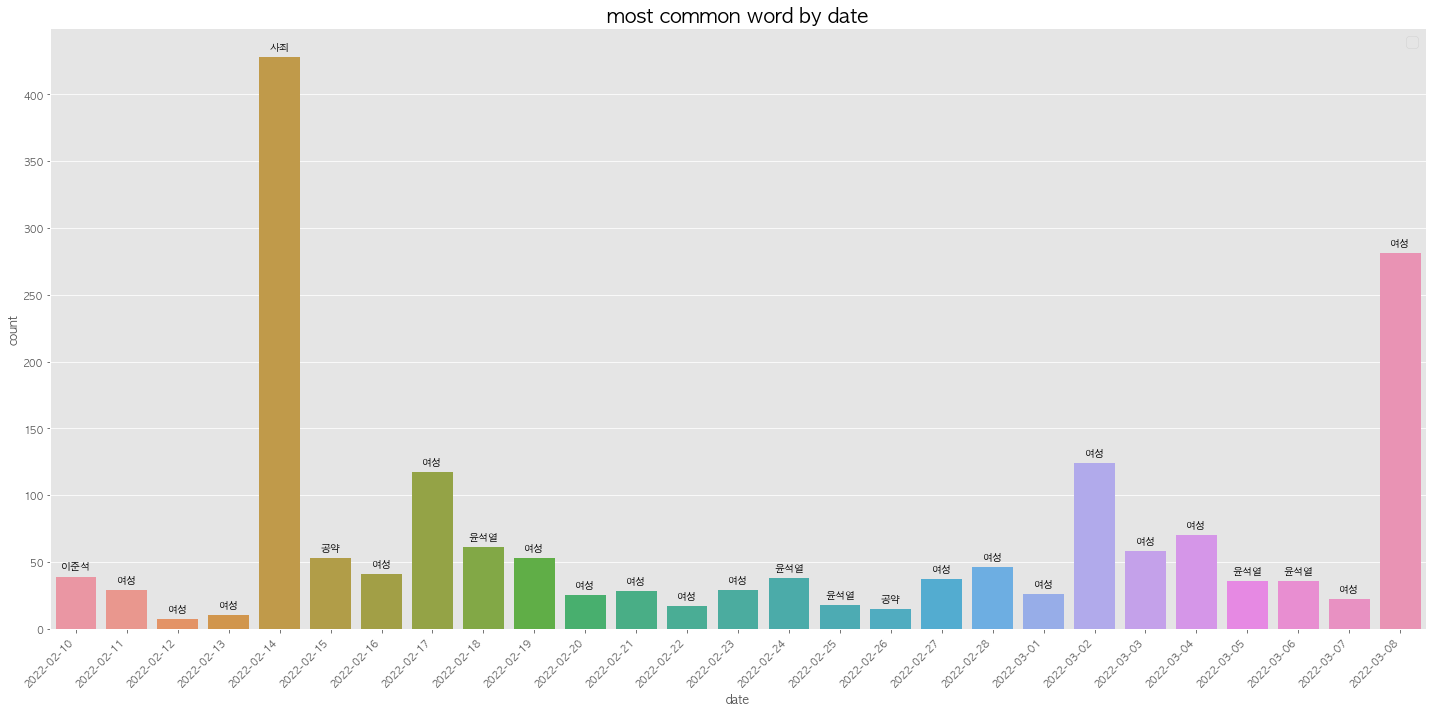

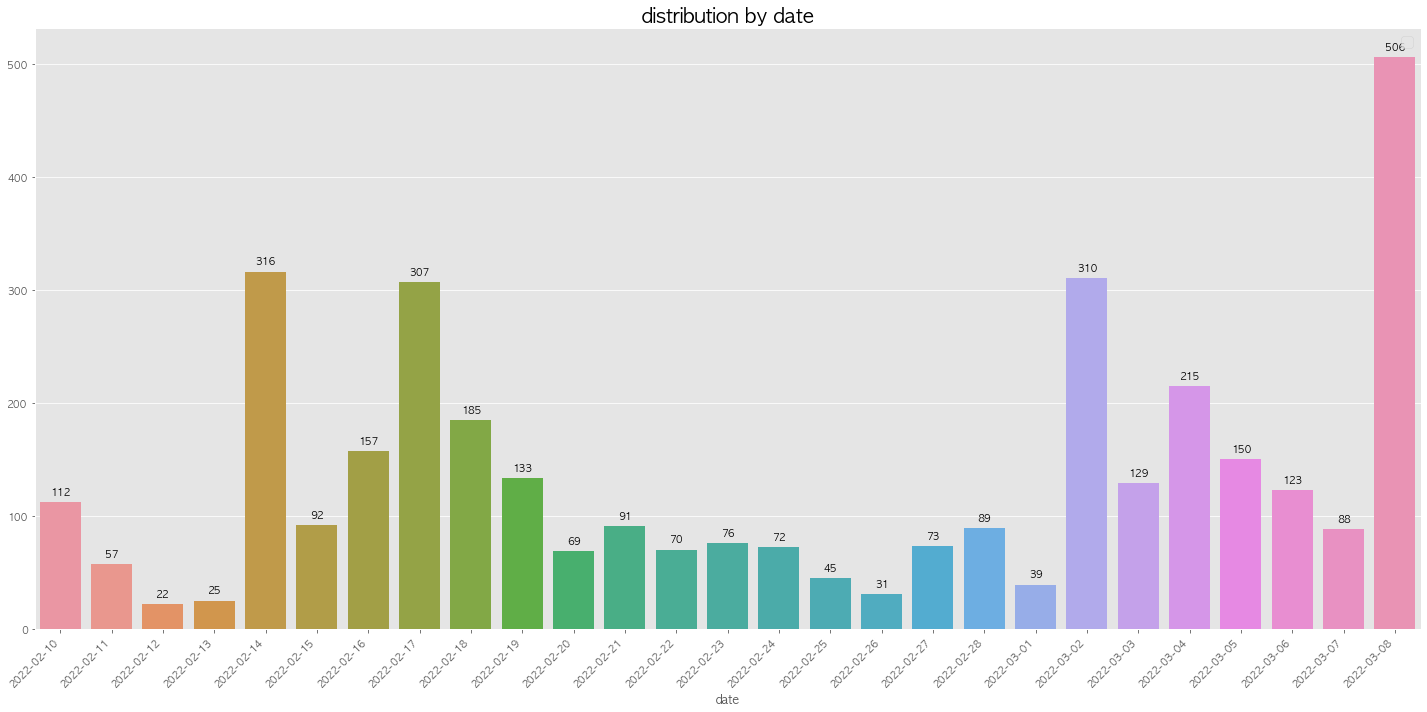

In [154]:
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date m")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(minister_m.groupby('date').count()['date_re'].index,
                   minister_m.groupby('date').count()['date_re'].values)
add_value_labels(ax, minister_m.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date m")

In [ ]:
# #국민의힘과_이준석은_사죄하라 해시 태그 운동

In [62]:
# repeal
repeal_r['date'] = pd.to_datetime(repeal_r['datetime']).apply(lambda x: x.date())
repeal_r['date_re'] = repeal_r['date'].apply(lambda x : x.strftime('%Y-%m-%d'))

date = []
word_list = []
count_list = []
# tokenizing_list = []

for i in repeal_r['date_re'].unique():
    tokenizing = sum(repeal_r[repeal_r['date_re'] == i]['tokenized'],[])
    c, cw = common_words(tokenizing, 1)    
    word = cw[0][0]
    count = cw[0][1]
    date.append(i)
    word_list.append(word)
    count_list.append(count)
    
dateworddict = {'date' : date, 'word' : word_list, 'count' : count_list}
test_df = pd.DataFrame(dateworddict, columns=['date', 'word', 'count'])

No handles with labels found to put in legend.


그림 저장: most common word by date r


No handles with labels found to put in legend.


그림 저장: distribution by date r


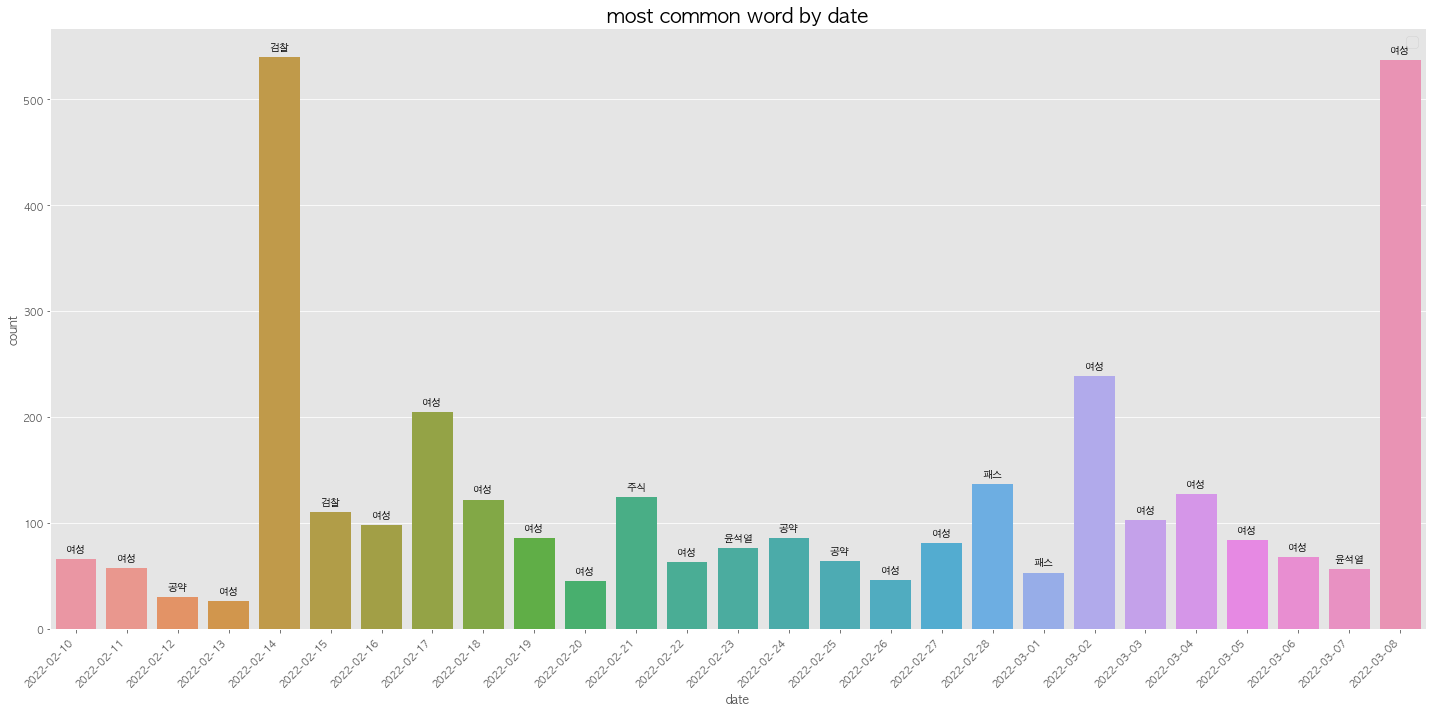

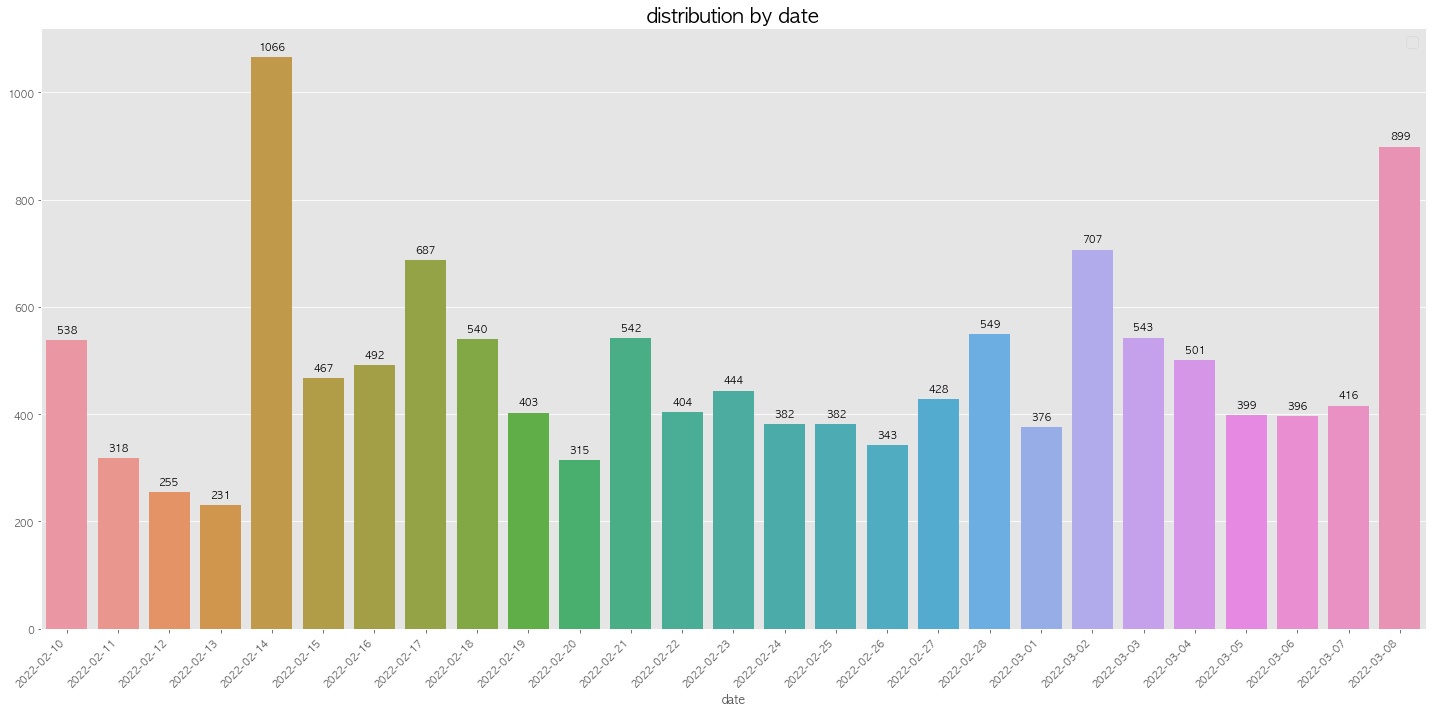

In [61]:
fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(test_df['date'], test_df['count'])
add_value_labels(ax, test_df['word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('most common word by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("most common word by date r")

fig, ax = plt.subplots(1, figsize=(20,10))
plot = sns.barplot(repeal_r.groupby('date').count()['date_re'].index,
                   repeal_r.groupby('date').count()['date_re'].values)
add_value_labels(ax, repeal_r.groupby('date').count()['date_re'].values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('distribution by date', fontsize=20)
plt.legend(fontsize=15)
save_fig("distribution by date r")

## multi label distribution

No handles with labels found to put in legend.


그림 저장: multi label distribution w


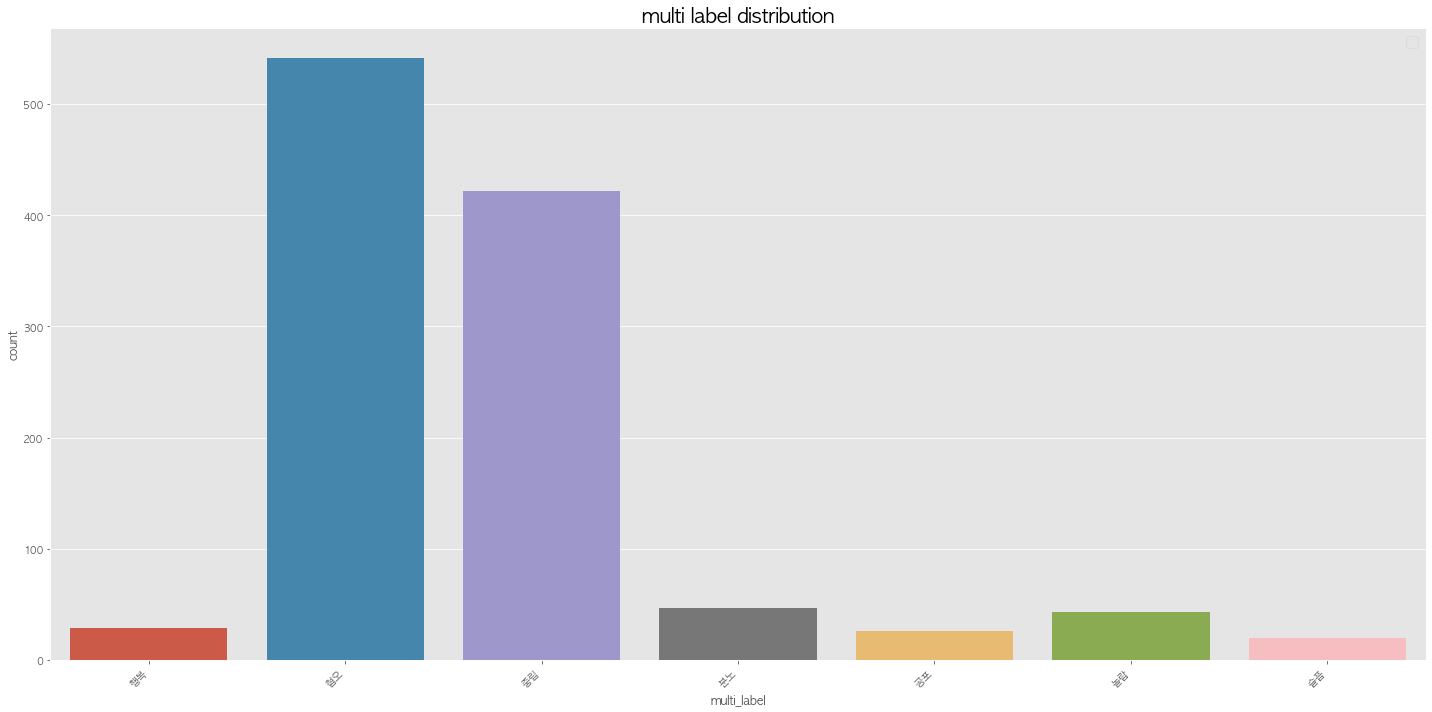

In [96]:
# women_policy
plt.figure(figsize=(20,10))
plot = sns.countplot(women_policy['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('multi label distribution w')

No handles with labels found to put in legend.


그림 저장: multi label distribution m


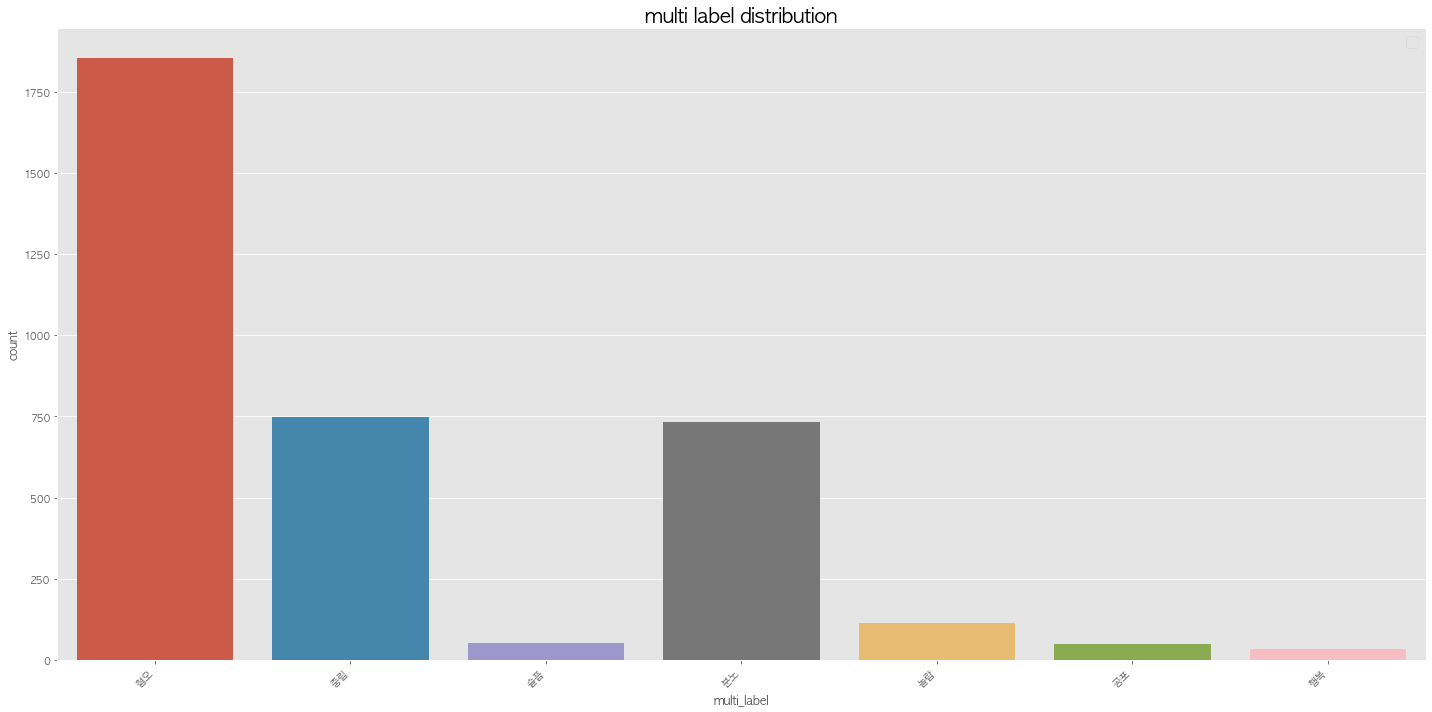

In [97]:
# minister
plt.figure(figsize=(20,10))
plot = sns.countplot(minister['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('multi label distribution m')

No handles with labels found to put in legend.


그림 저장: multi label distribution r


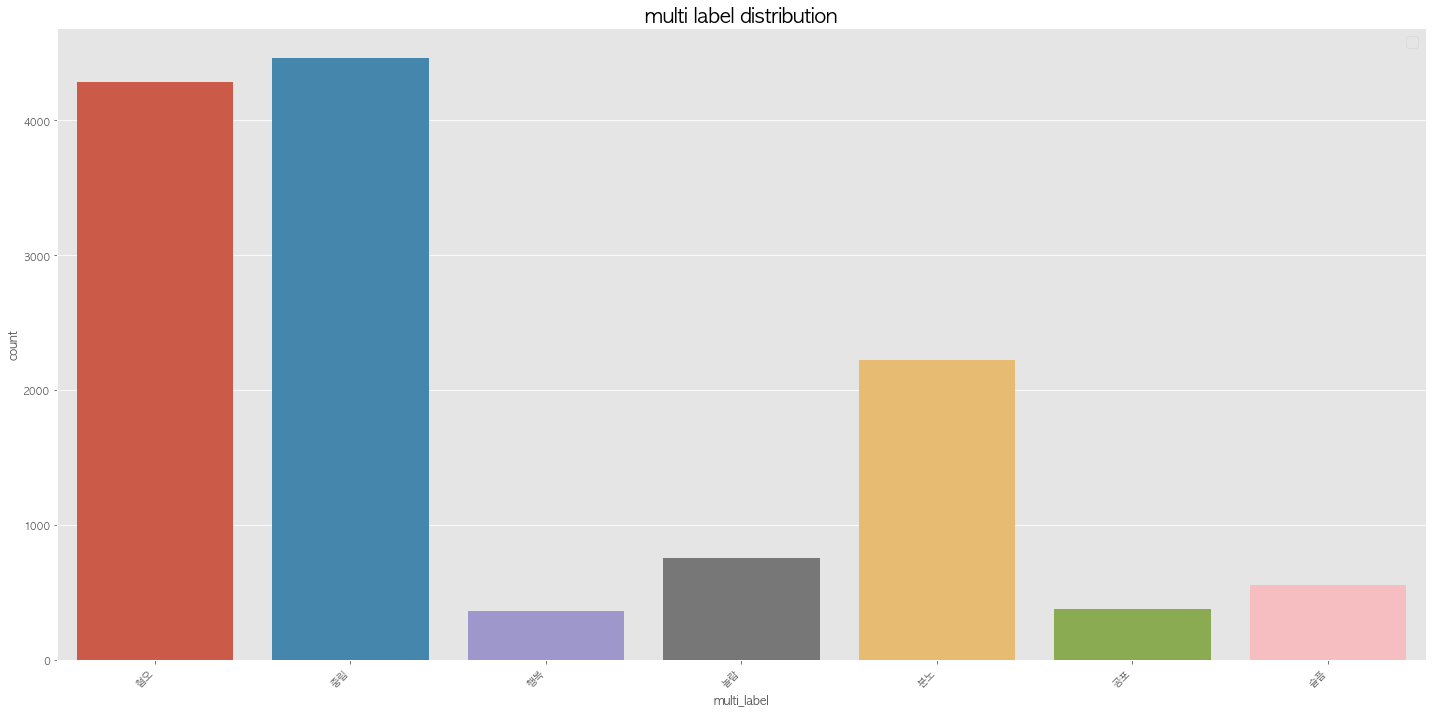

In [98]:
# repeal
plt.figure(figsize=(20,10))
plot = sns.countplot(repeal['multi_label'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('multi label distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('multi label distribution r')

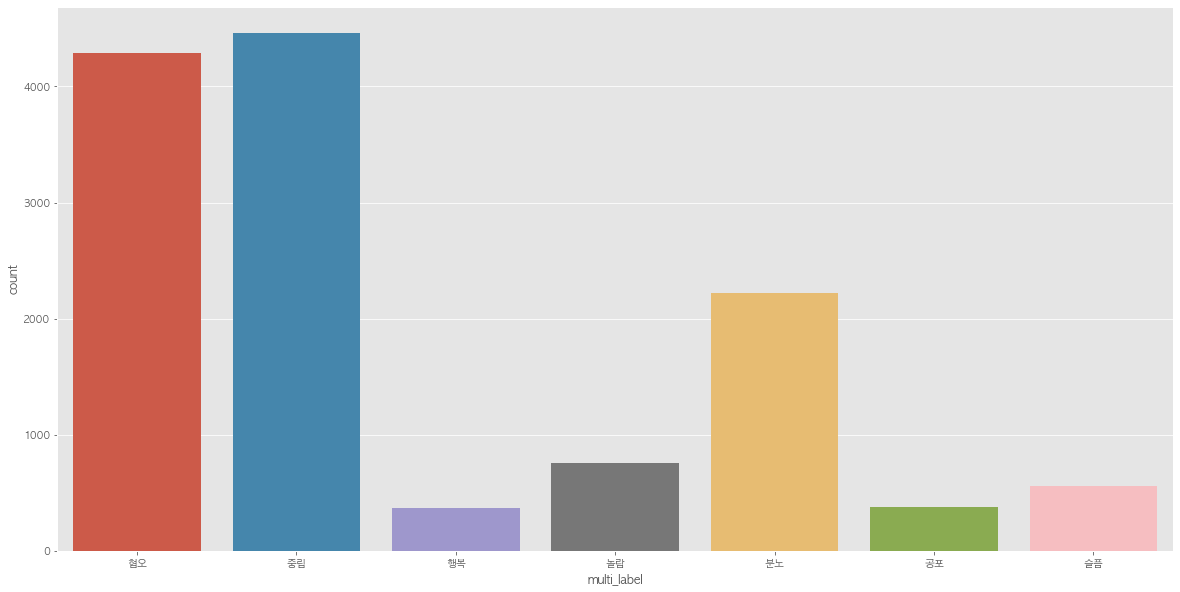

그림 저장: multi label distribution r


<Figure size 432x288 with 0 Axes>

In [65]:
# repeal
plt.figure(figsize=(20,10))
sns.countplot(repeal['multi_label'])
plt.show()
save_fig('multi label distribution r')

In [103]:
women_policy['multi_label'].unique()

array(['행복', '혐오', '중립', '분노', '공포', '놀람', '슬픔'], dtype=object)

In [132]:
wp_hp = women_policy[women_policy['multi_label'] == '행복']
wp_hate = women_policy[women_policy['multi_label'] == '혐오']
wp_n = women_policy[women_policy['multi_label'] == '중립']
wp_f = women_policy[women_policy['multi_label'] == '분노']
wp_sc = women_policy[women_policy['multi_label'] == '공포']
wp_sur = women_policy[women_policy['multi_label'] == '놀람']
wp_sad = women_policy[women_policy['multi_label'] == '슬픔']

<ipython-input-137-c2f917c0fdf5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_hp['tokenized'] = wp_hp['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_hp


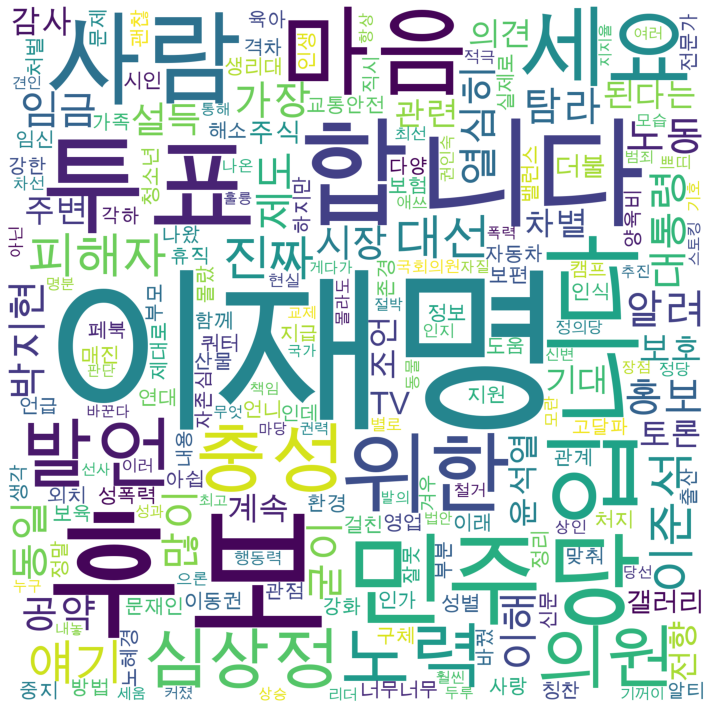

In [137]:
# women_policy without 여성, 정책
stop_words_w = ['여성', '정책']
wp_hp['tokenized'] = wp_hp['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_hp['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_hp')

<ipython-input-126-94c2729b5359>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_hate['tokenized'] = wp_hate['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_hate


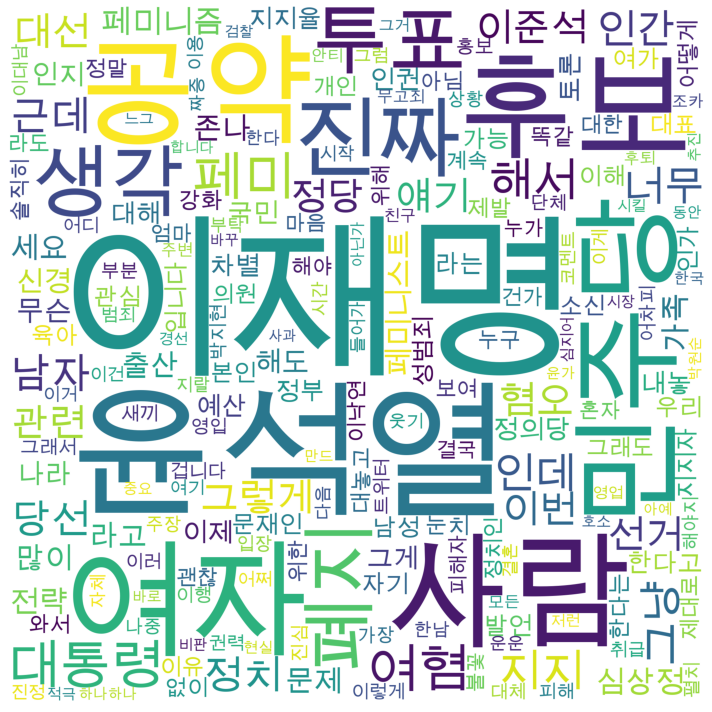

In [126]:
stop_words_w = ['여성', '정책']
wp_hate['tokenized'] = wp_hate['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_hate['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_hate')

<ipython-input-133-6816c87fb433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_n['tokenized'] = wp_n['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_n


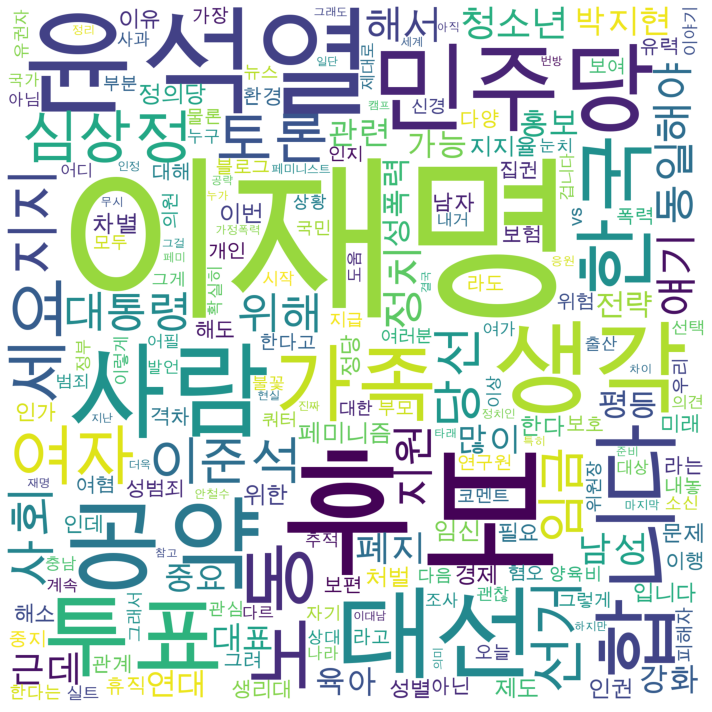

In [133]:
stop_words_w = ['여성', '정책']
wp_n['tokenized'] = wp_n['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_n['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_n')

<ipython-input-138-48cb96845e18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_f['tokenized'] = wp_f['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_f


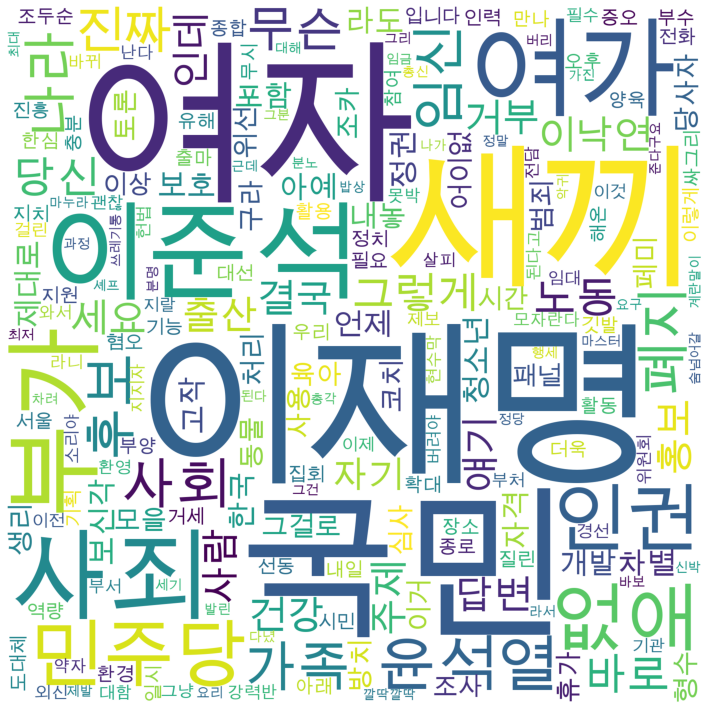

In [138]:
stop_words_w = ['여성', '정책']
wp_f['tokenized'] = wp_f['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_f['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_f')

<ipython-input-136-ec037252d7bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_sc['tokenized'] = wp_sc['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_sc


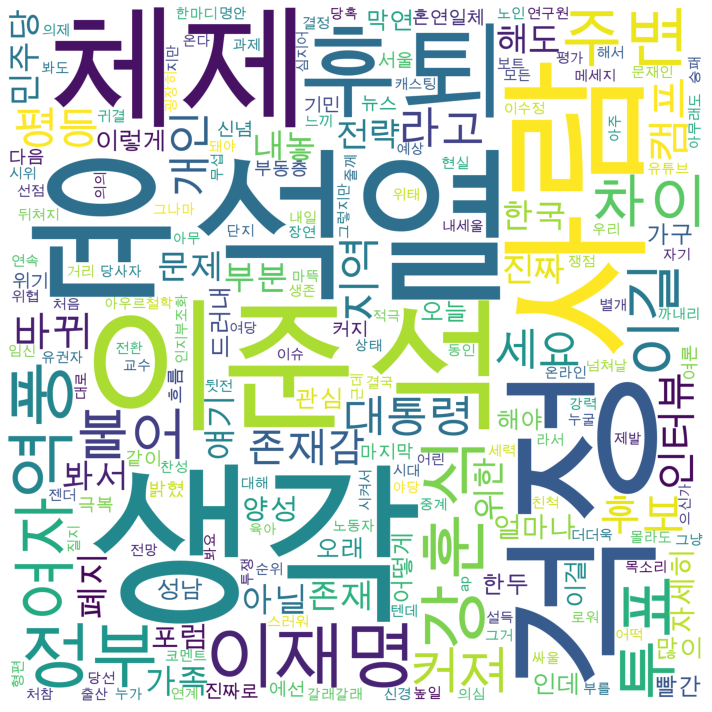

In [136]:
stop_words_w = ['여성', '정책']
wp_sc['tokenized'] = wp_sc['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_sc['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_sc')

<ipython-input-130-47cdf6e2b095>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_sur['tokenized'] = wp_sur['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_sur


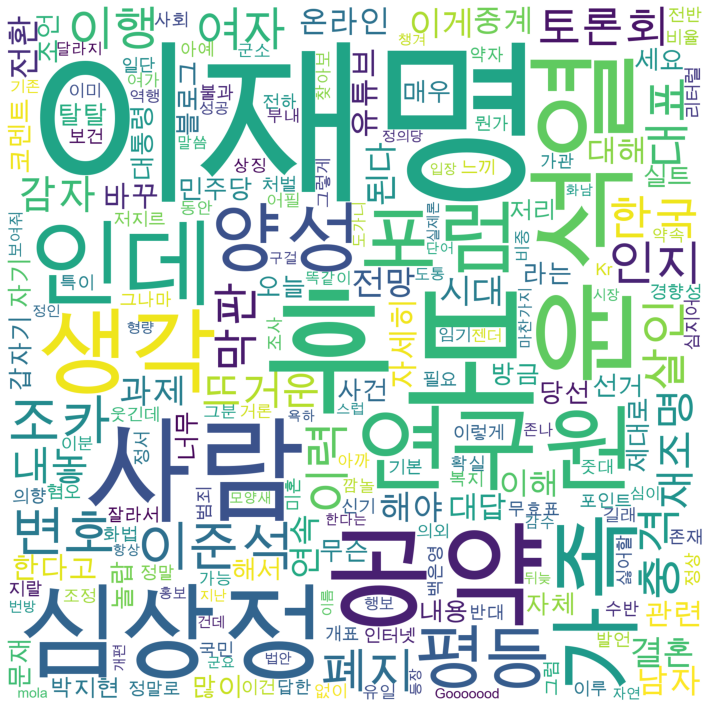

In [130]:
stop_words_w = ['여성', '정책']
wp_sur['tokenized'] = wp_sur['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_sur['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_sur')

<ipython-input-131-6a27dd5e82c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wp_sad['tokenized'] = wp_sad['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])


그림 저장: wordcloud without wp_sad


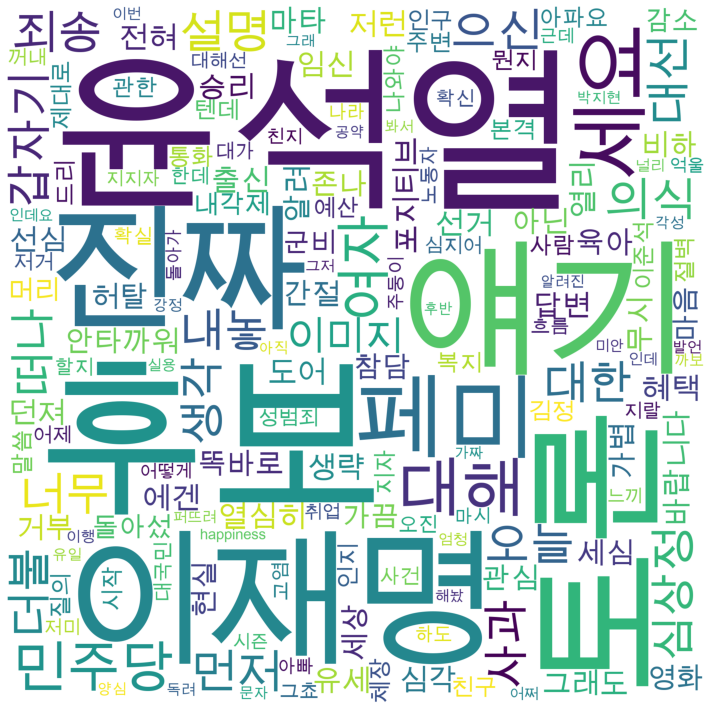

In [131]:
stop_words_w = ['여성', '정책']
wp_sad['tokenized'] = wp_sad['tokenized'].apply(lambda x: [item for item in x if item not in stop_words_w])

words_sum = sum(wp_sad['tokenized'], [])
c, cw = common_words(words_sum, 200)
wordcloud(c)
cw_table(cw)[:10]
save_fig('wordcloud without wp_sad')

## pos neg label distribution

No handles with labels found to put in legend.


그림 저장: pog neg label distribution w


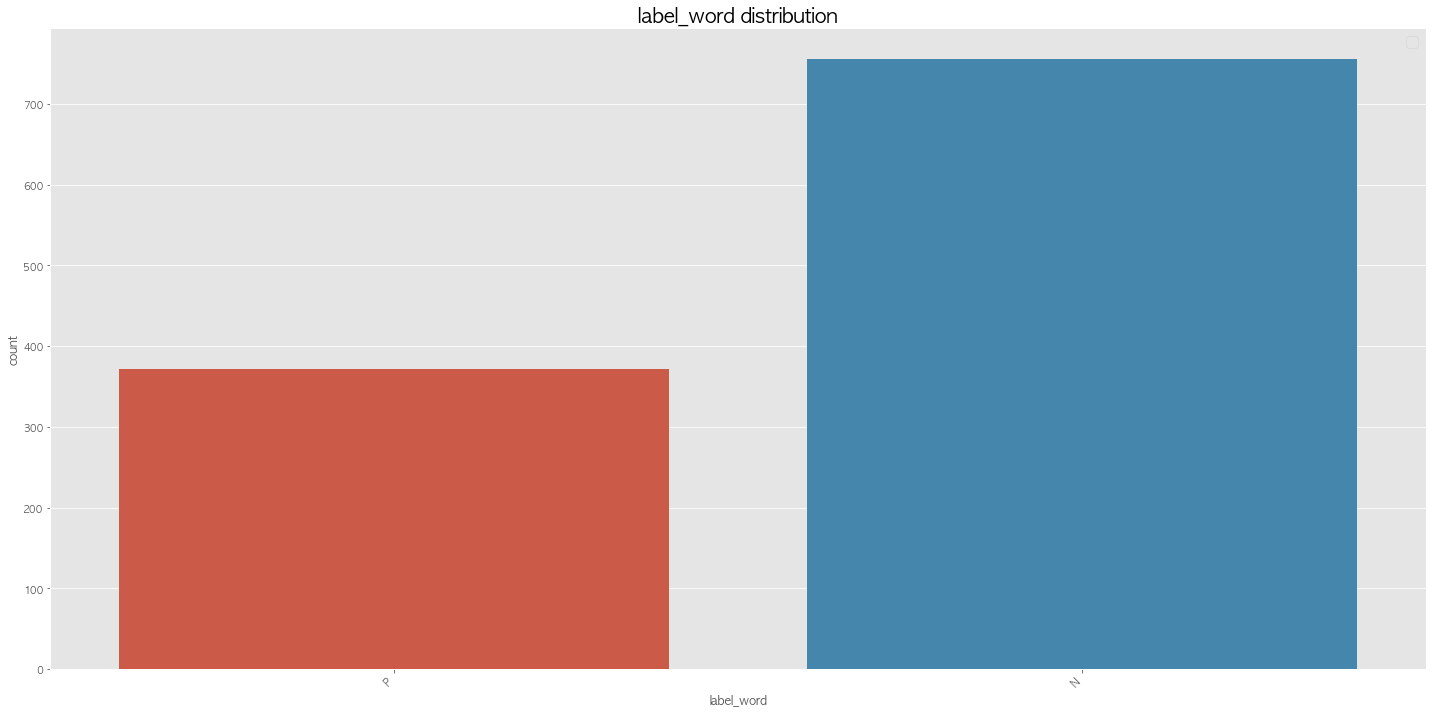

In [99]:
# women_policy
plt.figure(figsize=(20,10))
plot = sns.countplot(women_policy['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('pog neg label distribution w')

No handles with labels found to put in legend.


그림 저장: pog neg label distribution m


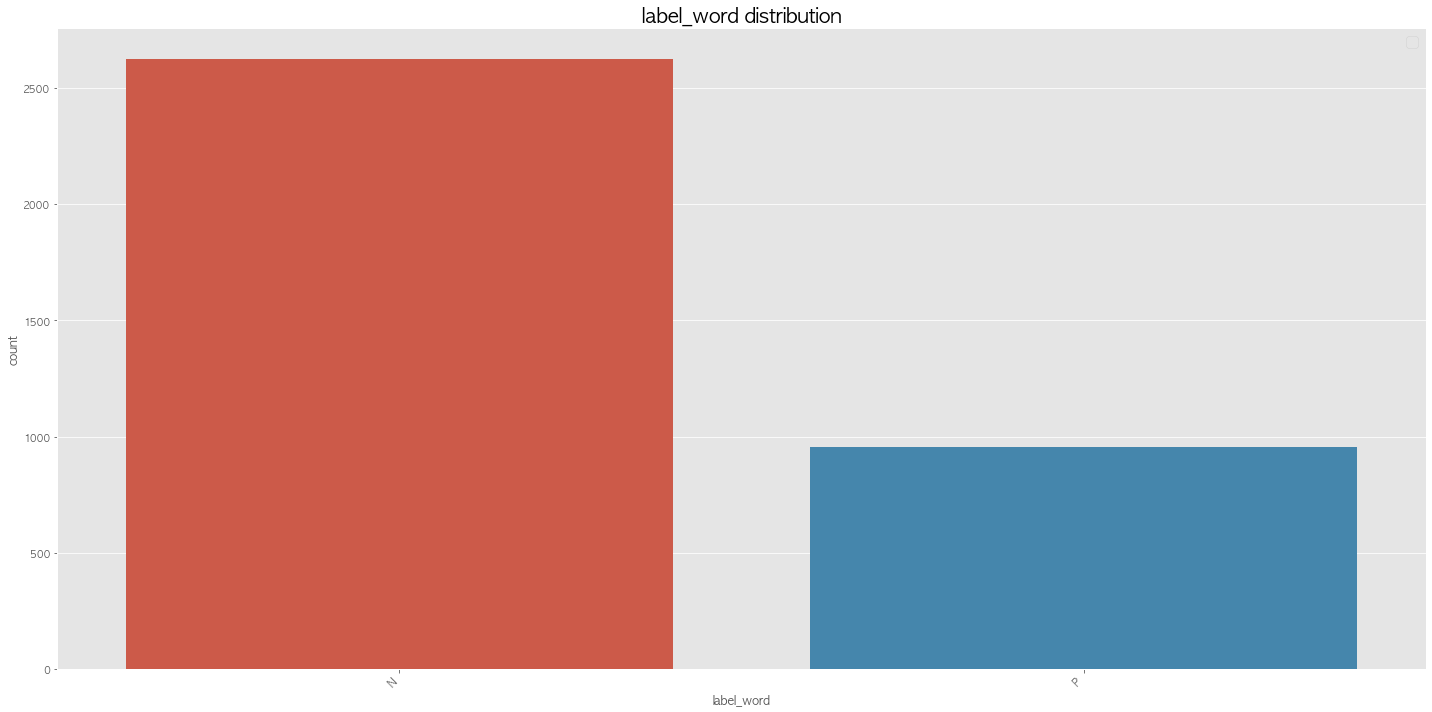

In [100]:
# minister
plt.figure(figsize=(20,10))
plot = sns.countplot(minister['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('pog neg label distribution m')

No handles with labels found to put in legend.


그림 저장: pog neg label distribution r


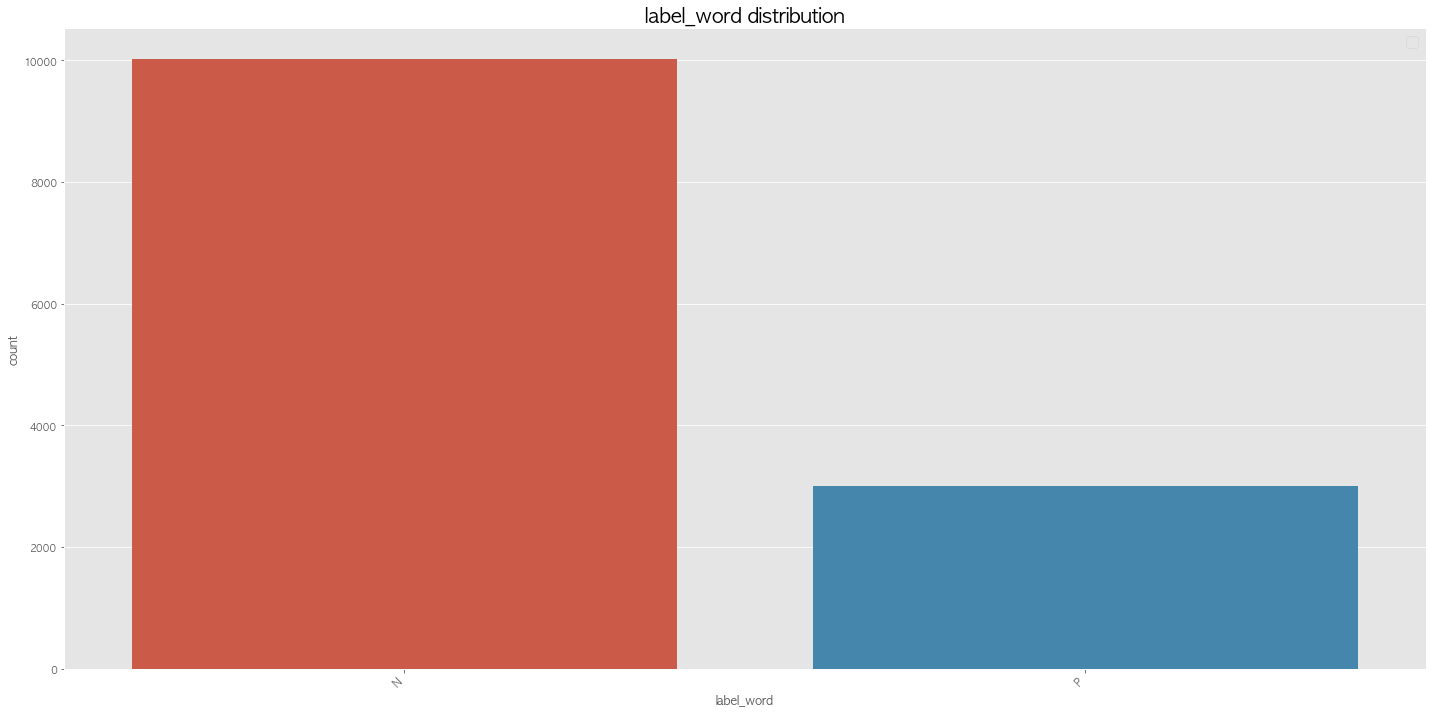

In [101]:
# repeal
plt.figure(figsize=(20,10))
plot = sns.countplot(repeal['label_word'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('label_word distribution', fontsize=20)
plt.legend(fontsize=15)
save_fig('pog neg label distribution r')

In [70]:
len(women_policy)

1128

In [71]:
len(minister)

3582

In [72]:
len(repeal)

13023

In [140]:
mecab.pos("여성가족부")

[('여성', 'NNG'), ('가족', 'NNG'), ('부', 'NNG')]

In [151]:
mecab.pos("여가부폐지")

[('여', 'NP'), ('가', 'JKS'), ('부', 'XPN'), ('폐지', 'NNG')]

In [ ]:
 
    JOSA = ["JKS", "JKC", "JKG", "JKO", "JKB", "JKV", "JKQ", "JX", "JC"] # 조사
    SIGN = ["SF", "SE", "SSO", "SSC", "SC", "SY"] # 문장 부호
    TERMINATION = ["EP", "EF", "EC", "ETN", "ETM"] # 어미
    SUPPORT_VERB = ["VX"] # 보조 용언
    NUMBER = ["SN"]
    

In [160]:
mecab.pos("움직이기")

[('움직이', 'VV'), ('기', 'ETN')]

In [149]:
minister[minister['text'].str.contains('여가부')]

datetime                   id  \
0     2022-02-10 01:54:58+00:00  1491591490899902466   
1     2022-02-10 02:00:14+00:00  1491592815926968324   
2     2022-02-10 02:27:07+00:00  1491599581721030659   
3     2022-02-10 02:32:35+00:00  1491600955636592640   
4     2022-02-10 02:34:28+00:00  1491601429483896832   
...                         ...                  ...   
3577  2022-03-08 23:07:43+00:00  1501333872868569090   
3578  2022-03-08 23:29:20+00:00  1501339311458844676   
3579  2022-03-08 23:31:55+00:00  1501339965204021251   
3580  2022-03-08 23:35:00+00:00  1501340740806320133   
3581  2022-03-08 23:55:19+00:00  1501345852450770945   

                                                   text         username  \
0     윤석열의 메시지를 보면  정치보복, 중국혐오, 북한선제타격, 백신패스, 여가부폐지,...        mungryang   
1     이재명 과거나 과연 이 공약을 지킬 지 여부를 떠나서...(사실 떠나야하나 내적갈등...  LSrgBqhSH0I04UP   
2     여가부 폐지하자는 새끼들인데... 소 귀에 경 읽어주고 계신 이용수 할머니;;; 🤦...        SEOJH3180   
3     위안부 문제 지원할거라고 당사자한테 면담한다고 가서 여가부 폐지한다고 씨부리고 오는...       beatdead22   
4              이용수 할머니 “여가부 폐지 말라” 호소에도 이준석 “입장 변화 없어”           newsvop   
...                                                 ...              ...   
3577  일부 찢 지지자들이 자꾸 윤이 남녀 갈라치기 한다고 조장하는데 윤은 세금만 축내는 ...         loveis86   
3578  내 부모세대 중 여가부가 어떤 일을 하는지 알기보다 그 빌어먹을 보soo 너튜브 +...         Snowl_00   
3579  아침부터 정치얘기 나와서 존나 동생이랑 싸우다가 (역시나 여가부 폐지한다고 2번찍은...          0o040o0   
3580  나는 무고죄 강화 , 여가부 폐지 , 의료 민영화를 외치는 인간이 대통령 하는 거 ...  affectionate524   
3581  3월9일 서울 유권자 수. 3만명. 부산. 울산. 경남. 전체 인구가 0만명이다. ...   kangminhyeok87   

                                                text_re multi_label    label  \
0     윤석열의 메시지를 보면  정치보복, 중국혐오, 북한선제타격, 백신패스, 여가부폐지,...          혐오  LABEL_0   
1     이재명 과거나 과연 이 공약을 지킬 지 여부를 떠나서...(사실 떠나야하나 내적갈등...          중립  LABEL_1   
2     여가부 폐지하자는 새끼들인데... 소 귀에 경 읽어주고 계신 이용수 할머니;;; 🤦...          슬픔  LABEL_0   
3     위안부 문제 지원할거라고 당사자한테 면담한다고 가서 여가부 폐지한다고 씨부리고 오는...          혐오  LABEL_0   
4              이용수 할머니 “여가부 폐지 말라” 호소에도 이준석 “입장 변화 없어”           혐오  LABEL_1   
...                                                 ...         ...      ...   
3577  일부 찢 지지자들이 자꾸 윤이 남녀 갈라치기 한다고 조장하는데 윤은 세금만 축내는 ...          중립  LABEL_0   
3578  내 부모세대 중 여가부가 어떤 일을 하는지 알기보다 그 빌어먹을 보soo 너튜브 +...          혐오  LABEL_0   
3579  아침부터 정치얘기 나와서 존나 동생이랑 싸우다가 (역시나 여가부 폐지한다고 2번찍은...          혐오  LABEL_0   
3580  나는 무고죄 강화 , 여가부 폐지 , 의료 민영화를 외치는 인간이 대통령 하는 거 ...          분노  LABEL_0   
3581  3월9일 서울 유권자 수. 3만명. 부산. 울산. 경남. 전체 인구가 0만명이다. ...          중립  LABEL_1   

         score label_word                                          tokenized  
0     0.994395          N  [윤석열, 메시지, 정치, 보복, 중국, 혐오, 북한, 선제, 타격, 백신, 패스,...  
1     0.970380          P  [이재명, 과거, 과연, 공약, 지킬, 여부, 떠나, 떠나, 갈등, 계속, 생기, ...  
2     0.768045          N                         [폐지, 새끼, 인데, 계신, 이용수, 할머니]  
3     0.996378          N  [위안부, 문제, 지원, 라고, 당사자, 면담, 한다고, 폐지, 한다고, 씨부리, ...  
4     0.878563          P           [이용수, 할머니, 여가, 폐지, 말라, 호소에, 이준석, 입장, 변화]  
...        ...        ...                                                ...  
3577  0.716350          N  [일부, 지지자, 자꾸, 남녀, 갈라치, 한다고, 조장, 세금, 축내, 부를, 폐지...  
3578  0.883076          N  [부모, 세대, 여가, 빌어먹, soo, 튜브, 여혐, 폐지, 사람, 비율, 진심,...  
3579  0.997018          N  [아침, 정치, 얘기, 나와서, 존나, 동생, 싸우, 역시, 여가, 폐지, 한다고,...  
3580  0.986575          N  [무고죄, 강화, 폐지, 의료, 민영화, 외치, 인간, 대통령, 씨발, 화염병, 제...  
3581  0.955882          P  [서울, 유권자, 부산, 울산, 경남, 전체, 인구, 진짜, 복잡, 전남, 광주, ...  

[3581 rows x 10 columns]